In [ ]:
# Genetic Algorithm

GENERATION 0:
  Best Fit: -2.6825113190164656, Mean Fit: -24.835502348154094
GENERATION 1:
  Best Fit: -1.6071485379995243, Mean Fit: -10.321409548178103
GENERATION 2:
  Best Fit: -1.2066407347309347, Mean Fit: -3.8258709554903625
GENERATION 3:
  Best Fit: -0.443280376557322, Mean Fit: -2.2512427532423276
GENERATION 4:
  Best Fit: -0.04916613812944104, Mean Fit: -1.116478691341304
GENERATION 5:
  Best Fit: -0.04916613812944104, Mean Fit: -0.5008731894922382
GENERATION 6:
  Best Fit: -0.04916613812944104, Mean Fit: -0.2804350298956989
GENERATION 7:
  Best Fit: -0.04916613812944104, Mean Fit: -0.06363160422470894
GENERATION 8:
  Best Fit: -0.04916613812944104, Mean Fit: -0.04916613812944103
GENERATION 9:
  Best Fit: -0.04916613812944104, Mean Fit: -0.04916613812944103
GENERATION 10:
  Best Fit: -0.04916613812944104, Mean Fit: -0.04916613812944103
GENERATION 11:
  Best Fit: -0.04916613812944104, Mean Fit: -0.25052872214284366
GENERATION 12:
  Best Fit: -0.04916613812944104, Mean Fit: -0.1

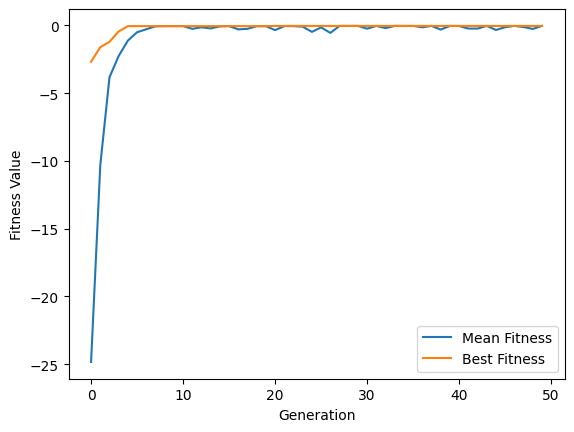

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def fitness_cal_sphere(population):
    return -np.sum(np.square(population), axis=1)


def tournament_selection(population, fitnesses, k, num_selected):
    selected_individuals = []
    for _ in range(num_selected):
        selected = random.sample(list(zip(population, fitnesses)), k)
        winner = max(selected, key=lambda ind: ind[1])
        selected_individuals.append(winner[0])
    return selected_individuals


def crossover_method(population, crossover_rate, num_offspring):
    offspring = []
    for _ in range(num_offspring):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < crossover_rate:
            cross_point = np.random.randint(1, len(parent1))
            child = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
        else:
            child = parent1
        offspring.append(child)
    return offspring


def mutation(population, mutation_rate):
    for i in range(len(population)):
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(0, len(population[i]))
            population[i][mutation_point] = np.random.uniform(-5.12, 5.12)
    return population

def main(coss_rate, mut_rate, generation):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12

    init_pop = [list(np.random.uniform(lower_bound, upper_bound, size)) for _ in range(100)]
    best_fit = []
    mean_fit = []

    for k in range(generation):
        fitness = fitness_cal_sphere(init_pop)
        selected = tournament_selection(init_pop, fitness, 5, len(init_pop))
        crossover_value = crossover_method(selected, coss_rate, len(init_pop))
        mutation_value = mutation(crossover_value, mut_rate)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.max(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        msg = "GENERATION {}:\n" \
              "  Best Fit: {}, Mean Fit: {}".format(k, fit_best, fit_mean)
        print(msg)

    x_range = range(0, generation)
    plt.plot(x_range, mean_fit, label="Mean Fitness")
    plt.plot(x_range, best_fit, label="Best Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.legend()
    plt.show()


main(coss_rate=0.7, mut_rate=0.01, generation=50)


GENERATION 0:
  Best Fit: 3.129928150681977, Mean Fit: 23.77974904185805
GENERATION 1:
  Best Fit: 3.129928150681977, Mean Fit: 10.703249686035704
GENERATION 2:
  Best Fit: 2.0196075599952708, Mean Fit: 5.955378180277207
GENERATION 3:
  Best Fit: 0.40641703951248587, Mean Fit: 3.458483404148375
GENERATION 4:
  Best Fit: 0.40641703951248587, Mean Fit: 2.3085803936817357
GENERATION 5:
  Best Fit: 0.40641703951248587, Mean Fit: 1.1036593419852025
GENERATION 6:
  Best Fit: 0.2700457979515235, Mean Fit: 0.713820868041957
GENERATION 7:
  Best Fit: 0.2700457979515235, Mean Fit: 0.41926713992431996
GENERATION 8:
  Best Fit: 0.2700457979515235, Mean Fit: 0.395618908134052
GENERATION 9:
  Best Fit: 0.25866266641364594, Mean Fit: 0.34402323560270814
GENERATION 10:
  Best Fit: 0.25866266641364594, Mean Fit: 2.2492961160908975
GENERATION 11:
  Best Fit: 0.25866266641364594, Mean Fit: 0.2982672706067461
GENERATION 12:
  Best Fit: 0.25866266641364594, Mean Fit: 0.2586626664136459
GENERATION 13:
  Bes

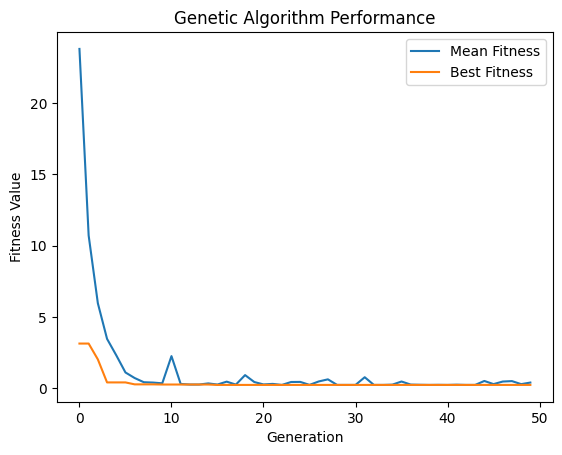

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)


def tournament_selection(population, fitnesses, k, num_selected):
    selected_individuals = []
    for _ in range(num_selected):
        selected = random.sample(list(zip(population, fitnesses)), k)
        winner = min(selected, key=lambda ind: ind[1])
        selected_individuals.append(winner[0])
    return selected_individuals


def crossover_method(population, crossover_rate, num_offspring):
    offspring = []
    for _ in range(num_offspring):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < crossover_rate:
            cross_point = np.random.randint(1, len(parent1))
            child = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
        else:
            child = parent1
        offspring.append(child)
    return offspring


def mutation(population, mutation_rate):
    for i in range(len(population)):
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(0, len(population[i]))
            population[i][mutation_point] = np.random.uniform(-5.12, 5.12)
    return population

def main(coss_rate, mut_rate, generation):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12

    init_pop = [list(np.random.uniform(lower_bound, upper_bound, size)) for _ in range(100)]
    best_fit = []
    mean_fit = []

    for k in range(generation):
        fitness = fitness_cal_sphere(init_pop)
        selected = tournament_selection(init_pop, fitness, 5, len(init_pop))
        crossover_value = crossover_method(selected, coss_rate, len(init_pop))
        mutation_value = mutation(crossover_value, mut_rate)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        msg = "GENERATION {}:\n" \
              "  Best Fit: {}, Mean Fit: {}".format(k, fit_best, fit_mean)
        print(msg)

    x_range = range(0, generation)
    plt.plot(x_range, mean_fit, label="Mean Fitness")
    plt.plot(x_range, best_fit, label="Best Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.title("Genetic Algorithm Performance")
    plt.legend()
    plt.show()


main(coss_rate=0.7, mut_rate=0.01, generation=50)


In [ ]:
# Fitness function is roulette wheel selection

GENERATION 0:
  Best Fit: 7.799364704988497, Mean Fit: 36.90233000657056
GENERATION 1:
  Best Fit: 0.7289937422828845, Mean Fit: 29.008901254237188
GENERATION 2:
  Best Fit: 0.2307409857118431, Mean Fit: 13.367980767574647
GENERATION 3:
  Best Fit: 0.2307409857118431, Mean Fit: 1.328005369608501
GENERATION 4:
  Best Fit: 0.18064375974807434, Mean Fit: 0.5455774180917748
GENERATION 5:
  Best Fit: 0.11139237722044167, Mean Fit: 0.4975238246982442
GENERATION 6:
  Best Fit: 0.11139237722044167, Mean Fit: 0.3505740642430617
GENERATION 7:
  Best Fit: 0.10367559616694369, Mean Fit: 0.273667718199205
GENERATION 8:
  Best Fit: 0.10367559616694369, Mean Fit: 0.3081146000280765
GENERATION 9:
  Best Fit: 0.10367559616694369, Mean Fit: 0.2648151025575013
GENERATION 10:
  Best Fit: 0.0576116692381023, Mean Fit: 0.17801764852569268
GENERATION 11:
  Best Fit: 0.06532845029160028, Mean Fit: 0.1950169341015994
GENERATION 12:
  Best Fit: 0.046501830325055456, Mean Fit: 0.16727748252077643
GENERATION 13:


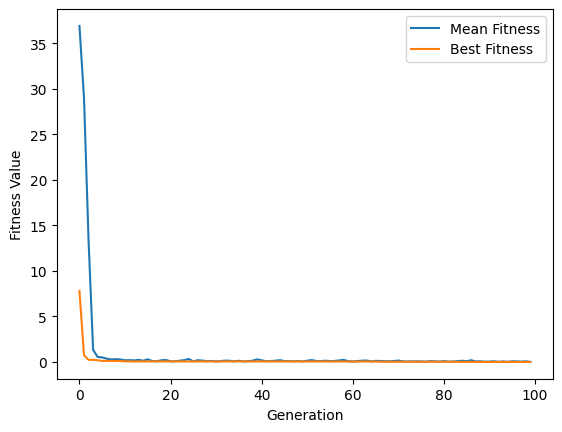

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


def fitness_cal_sphere(population):

    return np.sum(np.square(population), axis=1)


def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness


def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected


def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]


def mutation(population, mut_rate):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
    return population


def main(cross_rate, mut_rate, generations):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 100


    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []


    for k in range(generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value = mutation(crossover_value, mut_rate)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        msg = f"GENERATION {k}:\n  Best Fit: {fit_best}, Mean Fit: {fit_mean}"
        print(msg)

    # Plot the results
    x_range = range(0, generations)
    plt.plot(x_range, mean_fit, label="Mean Fitness")
    plt.plot(x_range, best_fit, label="Best Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.legend()
    plt.show()


main(0.85, 0.05, 100)


GENERATION 0:
  Best Fit: 1.9893835461109726, Mean Fit: 30.204939933548125
GENERATION 1:
  Best Fit: 0.7964566501152154, Mean Fit: 16.81769282310778
GENERATION 2:
  Best Fit: 0.7964566501152154, Mean Fit: 7.001662584264424
GENERATION 3:
  Best Fit: 0.5310747339854973, Mean Fit: 2.1824882723768706
GENERATION 4:
  Best Fit: 0.5310747339854973, Mean Fit: 1.322796025531066
GENERATION 5:
  Best Fit: 0.5310747339854973, Mean Fit: 1.1744462286283233
GENERATION 6:
  Best Fit: 0.5233806128048111, Mean Fit: 0.9131263876885026
GENERATION 7:
  Best Fit: 0.5074734008721636, Mean Fit: 0.8238979538657797
GENERATION 8:
  Best Fit: 0.5074734008721636, Mean Fit: 0.8208151316168711
GENERATION 9:
  Best Fit: 0.5074734008721636, Mean Fit: 0.8216087187784876
GENERATION 10:
  Best Fit: 0.5074734008721636, Mean Fit: 0.7646440676335788
GENERATION 11:
  Best Fit: 0.5074734008721636, Mean Fit: 0.7698476484887667
GENERATION 12:
  Best Fit: 0.5074734008721636, Mean Fit: 0.7222456495279679
GENERATION 13:
  Best Fit

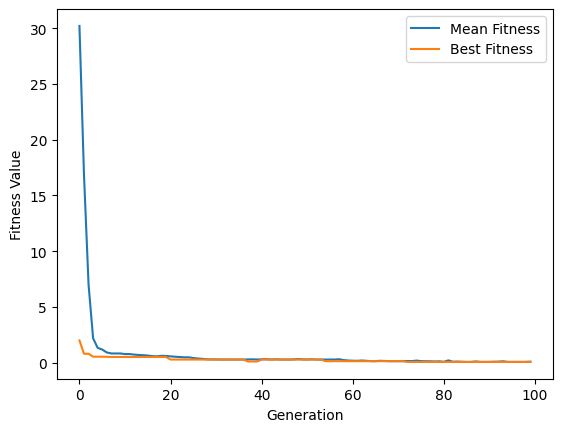

In [ ]:
main(0.85, 0.01, 100)

GENERATION 0:
  Best Fit: 7.001169005103029, Mean Fit: 35.68762074002079
GENERATION 1:
  Best Fit: 5.996679931918899, Mean Fit: 27.181815430779384
GENERATION 2:
  Best Fit: 1.918466655115571, Mean Fit: 17.904091436626313
GENERATION 3:
  Best Fit: 1.2653548805751458, Mean Fit: 14.651210901989266
GENERATION 4:
  Best Fit: 1.042540510993277, Mean Fit: 8.267384012887664
GENERATION 5:
  Best Fit: 1.0191882019745266, Mean Fit: 6.4011204073136865
GENERATION 6:
  Best Fit: 0.8028479193627699, Mean Fit: 3.5049186270939403
GENERATION 7:
  Best Fit: 0.4359116624693025, Mean Fit: 2.2032205352899106
GENERATION 8:
  Best Fit: 0.4359116624693025, Mean Fit: 1.5454022215899064
GENERATION 9:
  Best Fit: 0.4359116624693025, Mean Fit: 1.291302985984278
GENERATION 10:
  Best Fit: 0.24406180082641685, Mean Fit: 1.0928116628441569
GENERATION 11:
  Best Fit: 0.24406180082641685, Mean Fit: 1.040169167946066
GENERATION 12:
  Best Fit: 0.24406180082641685, Mean Fit: 0.8304949184821655
GENERATION 13:
  Best Fit: 

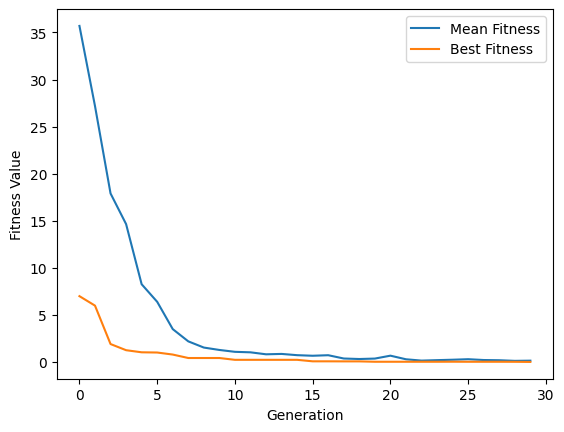

In [ ]:
main(0.75, 0.1, 30)

GENERATION 0:
  Best Fit: 5.752258208922606, Mean Fit: 34.458142574961855
GENERATION 1:
  Best Fit: 5.752258208922606, Mean Fit: 27.883973814219495
GENERATION 2:
  Best Fit: 4.84064471450838, Mean Fit: 22.018773478005823
GENERATION 3:
  Best Fit: 1.1820442546215657, Mean Fit: 13.996083355595951
GENERATION 4:
  Best Fit: 1.1820442546215657, Mean Fit: 9.201813419149092
GENERATION 5:
  Best Fit: 1.1820419302037348, Mean Fit: 4.376483231121189
GENERATION 6:
  Best Fit: 1.1820442546215657, Mean Fit: 2.9323332450590853
GENERATION 7:
  Best Fit: 1.1349653005616045, Mean Fit: 1.8198002609269264
GENERATION 8:
  Best Fit: 1.1820442546215657, Mean Fit: 1.4382104581683268
GENERATION 9:
  Best Fit: 1.1820442546215657, Mean Fit: 1.3398080116054596
GENERATION 10:
  Best Fit: 0.1891109369629293, Mean Fit: 1.2497462687975114
GENERATION 11:
  Best Fit: 0.1891109369629293, Mean Fit: 1.2117653616668183
GENERATION 12:
  Best Fit: 0.1891109369629293, Mean Fit: 1.1596688899745928
GENERATION 13:
  Best Fit: 0

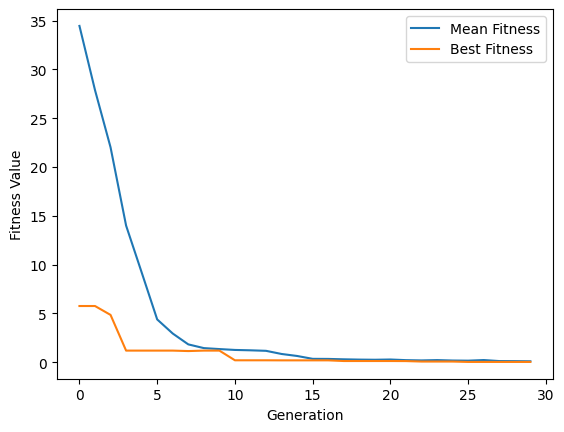

In [ ]:
main(0.85, 0.05, 30)

In [ ]:
# Genetic Algorithm with Stoping criteria

GENERATION 0:
  Best Fit: 5.3066485838348605, Mean Fit: 38.28894767440062
GENERATION 1:
  Best Fit: 2.779551182726522, Mean Fit: 28.275648388033677
GENERATION 2:
  Best Fit: 1.6233312772103676, Mean Fit: 18.28242393443165
GENERATION 3:
  Best Fit: 1.4411661940075493, Mean Fit: 11.83887787778962
GENERATION 4:
  Best Fit: 1.0077166336215073, Mean Fit: 8.857101338298687
GENERATION 5:
  Best Fit: 0.7392164836900961, Mean Fit: 6.899057915306654
GENERATION 6:
  Best Fit: 0.3920703611490883, Mean Fit: 3.921841186908405
GENERATION 7:
  Best Fit: 0.21582392996384056, Mean Fit: 2.765320669030297
GENERATION 8:
  Best Fit: 0.26349422865019717, Mean Fit: 2.344262447120185
GENERATION 9:
  Best Fit: 0.3176424786606607, Mean Fit: 2.066133114464423
GENERATION 10:
  Best Fit: 0.20309817081772918, Mean Fit: 1.297942842748172
GENERATION 11:
  Best Fit: 0.1377130118266903, Mean Fit: 1.2325016010571348
GENERATION 12:
  Best Fit: 0.18519618564777476, Mean Fit: 1.502597311733095
GENERATION 13:
  Best Fit: 0.1

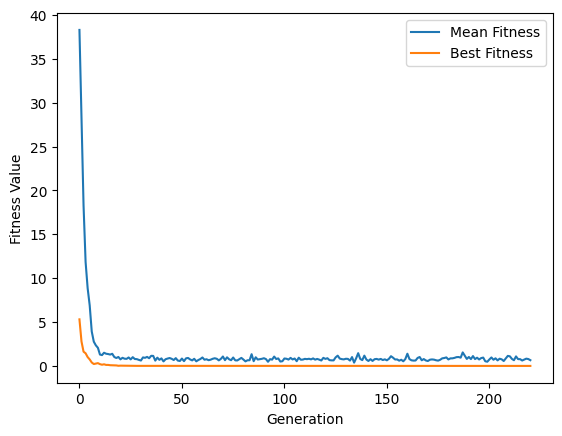

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate,count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population,count

def main(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 100

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value,count = mutation(crossover_value, mut_rate,count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        msg = f"GENERATION {k}:\n  Best Fit: {fit_best}, Mean Fit: {fit_mean}"
        print(msg)


        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            print(f"Stopping criteria met at generation {k}.")
            print(f"Mutation count {count}")
            break

        prev_best_fit = fit_best

    # Plot the results
    x_range = range(len(best_fit))
    plt.plot(x_range, mean_fit, label="Mean Fitness")
    plt.plot(x_range, best_fit, label="Best Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.legend()
    plt.show()


main(cross_rate=0.85, mut_rate=0.7, max_generations=1000, patience=20)


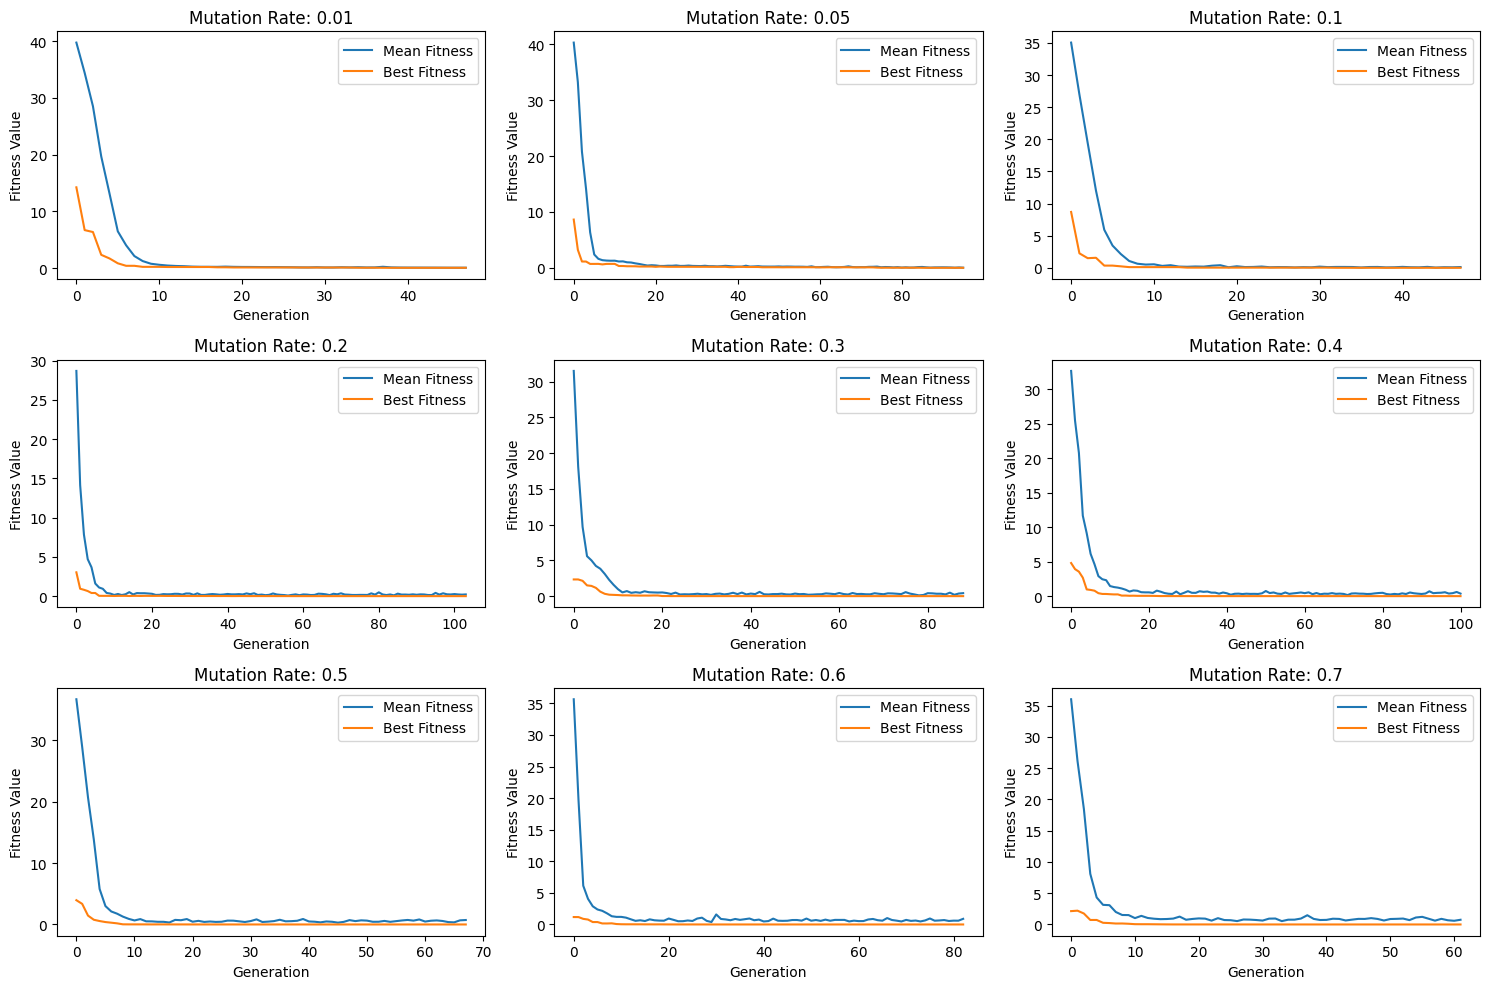

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random



def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 100

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    return best_fit, mean_fit

def plot_experiments():
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    max_generations = 1000
    patience = 10
    cross_rate = 0.85

    for ax, mut_rate in zip(axes.flatten(), mutation_rates):
        best_fit, mean_fit = run_experiment(cross_rate, mut_rate, max_generations, patience)
        x_range = range(len(best_fit))
        ax.plot(x_range, mean_fit, label="Mean Fitness")
        ax.plot(x_range, best_fit, label="Best Fitness")
        ax.set_title(f"Mutation Rate: {mut_rate}")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Fitness Value")
        ax.legend()

    plt.tight_layout()
    plt.show()


plot_experiments()


Mutation Rate: 0.01
Best Fitness: 0.43099418197458517
Mean Fitness: 0.5060997118851219
Total Mutation Count: 16

Mutation Rate: 0.05
Best Fitness: 0.001280240993482757
Mean Fitness: 0.12144501884768596
Total Mutation Count: 320

Mutation Rate: 0.1
Best Fitness: 0.012053839273864034
Mean Fitness: 0.20797686451921135
Total Mutation Count: 427

Mutation Rate: 0.2
Best Fitness: 0.000593758425055667
Mean Fitness: 0.12573246566594673
Total Mutation Count: 1672

Mutation Rate: 0.3
Best Fitness: 0.0008916719296468891
Mean Fitness: 0.3104518949910523
Total Mutation Count: 2133

Mutation Rate: 0.4
Best Fitness: 0.00022121389852230625
Mean Fitness: 0.37571117064124027
Total Mutation Count: 4258

Mutation Rate: 0.5
Best Fitness: 0.00013718276257810604
Mean Fitness: 0.5231938067201741
Total Mutation Count: 4181

Mutation Rate: 0.6
Best Fitness: 3.2711196269318554e-06
Mean Fitness: 0.5805066348735783
Total Mutation Count: 5365

Mutation Rate: 0.7
Best Fitness: 1.2319387638860242e-05
Mean Fitness: 1.

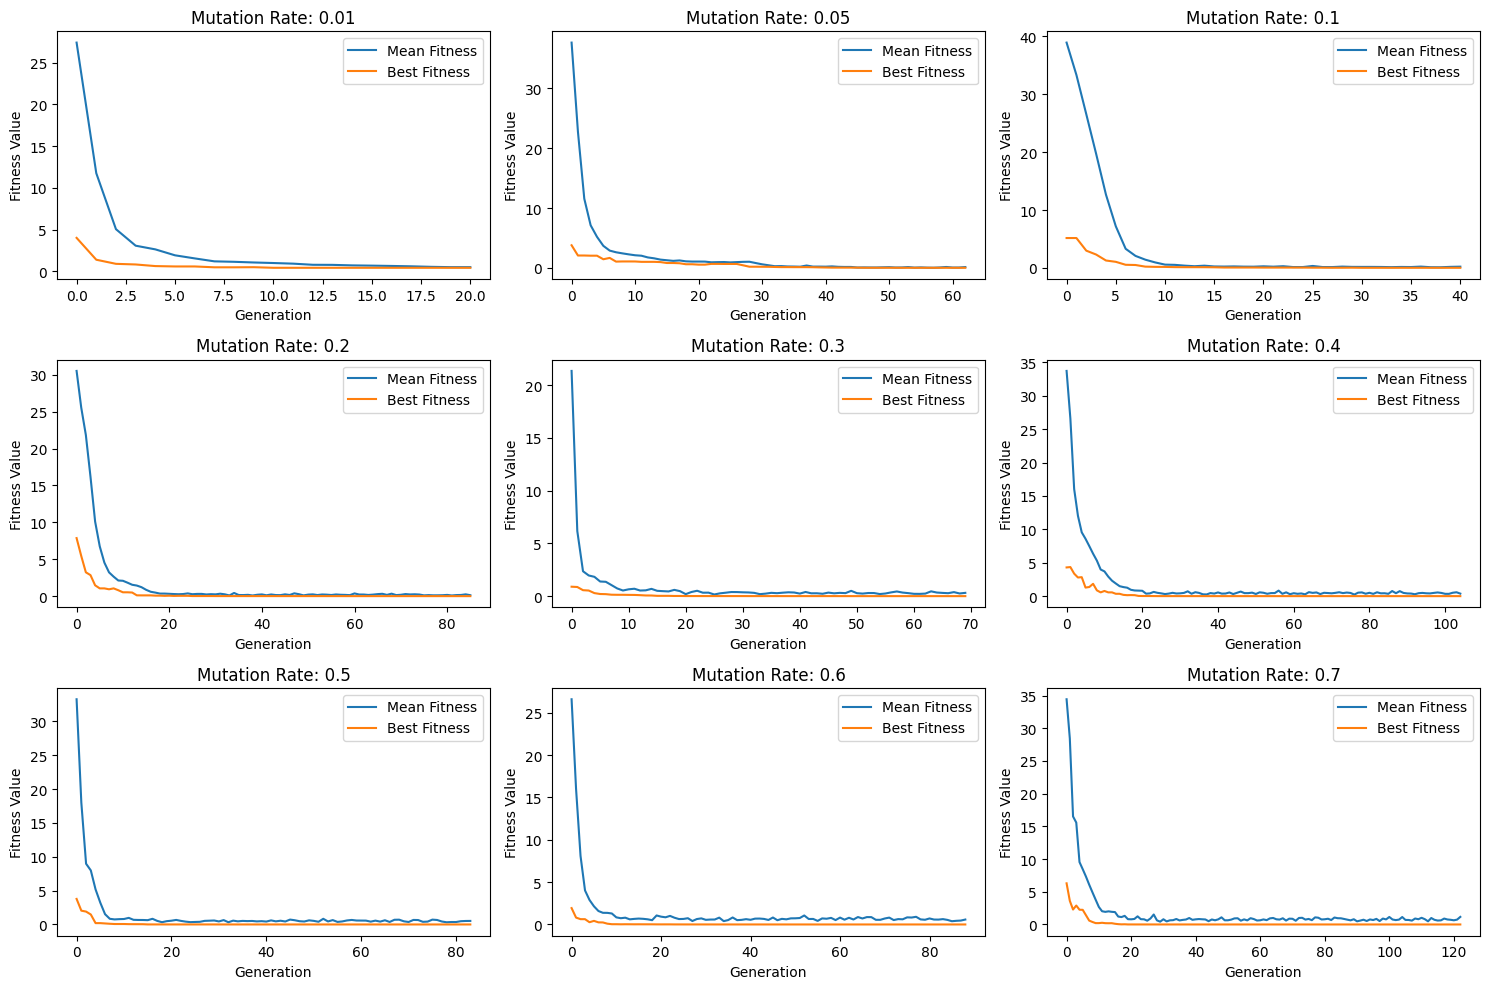

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 100

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}\n")

    return best_fit, mean_fit, count

def plot_experiments():
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    max_generations = 1000
    patience = 10
    cross_rate = 0.85

    for ax, mut_rate in zip(axes.flatten(), mutation_rates):
        best_fit, mean_fit, count = run_experiment(cross_rate, mut_rate, max_generations, patience)
        x_range = range(len(best_fit))
        ax.plot(x_range, mean_fit, label="Mean Fitness")
        ax.plot(x_range, best_fit, label="Best Fitness")
        ax.set_title(f"Mutation Rate: {mut_rate}")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Fitness Value")
        ax.legend()

    plt.tight_layout()
    plt.show()


plot_experiments()


Crossover Rate: 0.1
Best Fitness: 1.2198471320305933
Mean Fitness: 15.662311367587353
Total Mutation Count: 70147

Crossover Rate: 0.3
Best Fitness: 0.000555469708226582
Mean Fitness: 3.5440459818927508
Total Mutation Count: 10539

Crossover Rate: 0.5
Best Fitness: 0.0002249126785205475
Mean Fitness: 1.7936421877417863
Total Mutation Count: 11545

Crossover Rate: 0.7
Best Fitness: 8.116529713985752e-05
Mean Fitness: 1.406321695206824
Total Mutation Count: 6316

Crossover Rate: 0.8
Best Fitness: 1.3415572916883688e-05
Mean Fitness: 0.8094676552296179
Total Mutation Count: 7970

Crossover Rate: 0.85
Best Fitness: 0.00013527656025441432
Mean Fitness: 0.5330778444684633
Total Mutation Count: 4188

Crossover Rate: 0.9
Best Fitness: 2.6678431203019225e-05
Mean Fitness: 0.7918541225531783
Total Mutation Count: 5407

Crossover Rate: 0.95
Best Fitness: 0.00014316239184577914
Mean Fitness: 0.8408862603499281
Total Mutation Count: 5183

Crossover Rate: 1.0
Best Fitness: 6.482053758504806e-05
Mean

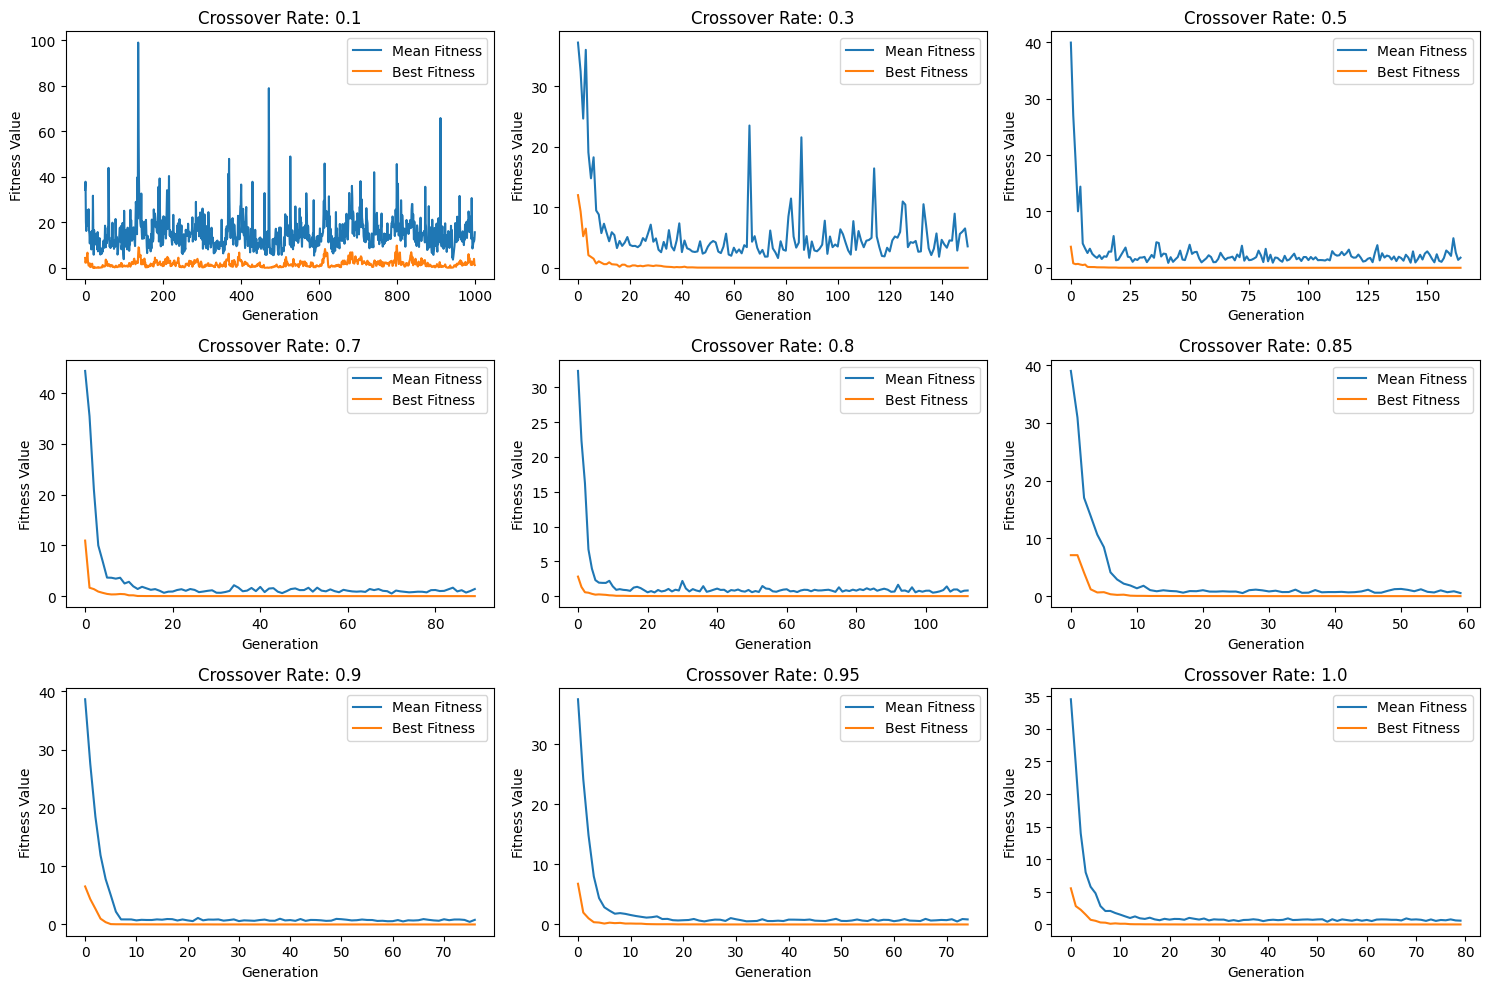

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 100

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Crossover Rate: {cross_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}\n")

    return best_fit, mean_fit, count

def plot_experiments():
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    crossover_rates = [0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0]
    max_generations = 1000
    patience = 10
    mutation_rate = 0.7

    for ax, cross_rate in zip(axes.flatten(), crossover_rates):
        best_fit, mean_fit, count = run_experiment(cross_rate, mutation_rate, max_generations, patience)
        x_range = range(len(best_fit))
        ax.plot(x_range, mean_fit, label="Mean Fitness")
        ax.plot(x_range, best_fit, label="Best Fitness")
        ax.set_title(f"Crossover Rate: {cross_rate}")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Fitness Value")
        ax.legend()

    plt.tight_layout()
    plt.show()


plot_experiments()


Mutation Rate: 0.01
Best Fitness: 0.10557844013077268
Mean Fitness: 0.10557844013077267
Total Mutation Count: 44
Number of Generations: 43

Mutation Rate: 0.05
Best Fitness: 0.025359094072749475
Mean Fitness: 0.11607164140464628
Total Mutation Count: 295
Number of Generations: 62

Mutation Rate: 0.1
Best Fitness: 0.0041275371262332015
Mean Fitness: 0.16478457231692278
Total Mutation Count: 623
Number of Generations: 68

Mutation Rate: 0.2
Best Fitness: 0.00019499611326483278
Mean Fitness: 0.15458183151702182
Total Mutation Count: 2951
Number of Generations: 149

Mutation Rate: 0.3
Best Fitness: 0.0001100617602186186
Mean Fitness: 0.2415748251343283
Total Mutation Count: 1736
Number of Generations: 57

Mutation Rate: 0.4
Best Fitness: 0.0002960964458243804
Mean Fitness: 0.4661261706218108
Total Mutation Count: 3572
Number of Generations: 92

Mutation Rate: 0.5
Best Fitness: 8.569135138837909e-05
Mean Fitness: 0.4112879946432464
Total Mutation Count: 6494
Number of Generations: 131

Muta

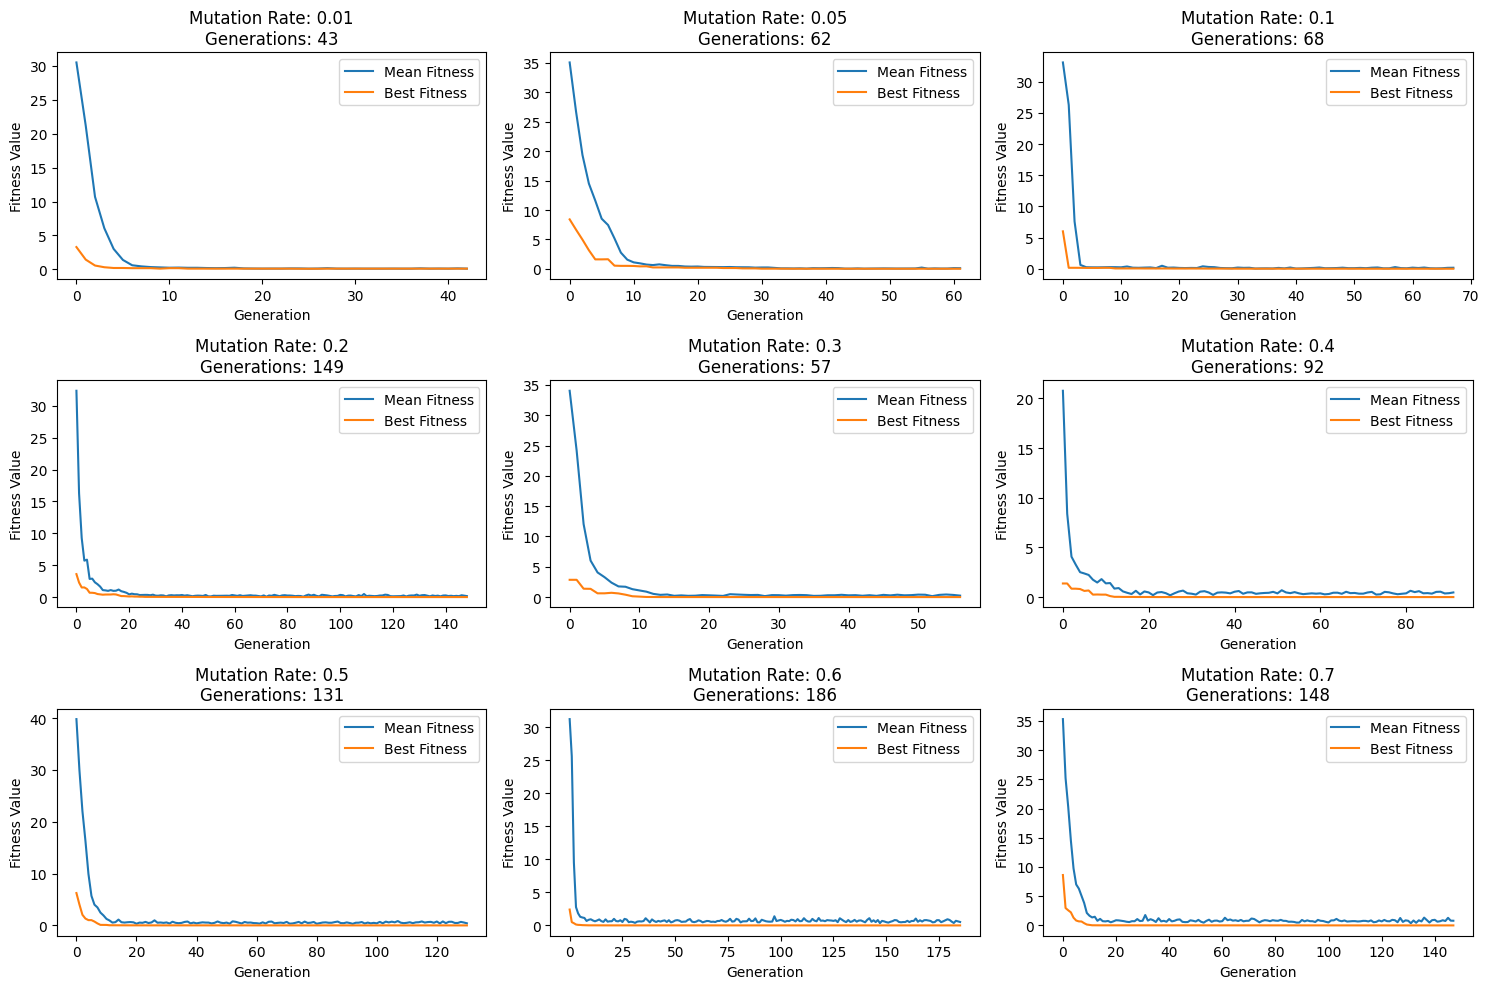

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 100

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")

    return best_fit, mean_fit, count, k + 1

def plot_experiments():
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    max_generations = 1000
    patience = 15
    cross_rate = 0.85

    for ax, mut_rate in zip(axes.flatten(), mutation_rates):
        best_fit, mean_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience)
        x_range = range(len(best_fit))
        ax.plot(x_range, mean_fit, label="Mean Fitness")
        ax.plot(x_range, best_fit, label="Best Fitness")
        ax.set_title(f"Mutation Rate: {mut_rate}\nGenerations: {generations}")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Fitness Value")
        ax.legend()

    plt.tight_layout()
    plt.show()


plot_experiments()


Mutation Rate: 0.01
Best Fitness: 0.17350312051160793
Mean Fitness: 0.17350312051160796
Total Mutation Count: 125
Number of Generations: 105

Mutation Rate: 0.05
Best Fitness: 0.005678946819786237
Mean Fitness: 0.023183595937266897
Total Mutation Count: 326
Number of Generations: 66

Mutation Rate: 0.1
Best Fitness: 0.0005842521371036459
Mean Fitness: 0.05146005392898313
Total Mutation Count: 1895
Number of Generations: 172

Mutation Rate: 0.2
Best Fitness: 0.00011515419911691374
Mean Fitness: 0.17999754116039487
Total Mutation Count: 4918
Number of Generations: 219

Mutation Rate: 0.3
Best Fitness: 0.0002986561666647029
Mean Fitness: 0.26155164017126
Total Mutation Count: 4271
Number of Generations: 128

Mutation Rate: 0.4
Best Fitness: 4.334139343450975e-05
Mean Fitness: 0.4460525991287008
Total Mutation Count: 5127
Number of Generations: 119

Mutation Rate: 0.5
Best Fitness: 1.1710050738369425e-05
Mean Fitness: 0.5970412746615782
Total Mutation Count: 14308
Number of Generations: 26

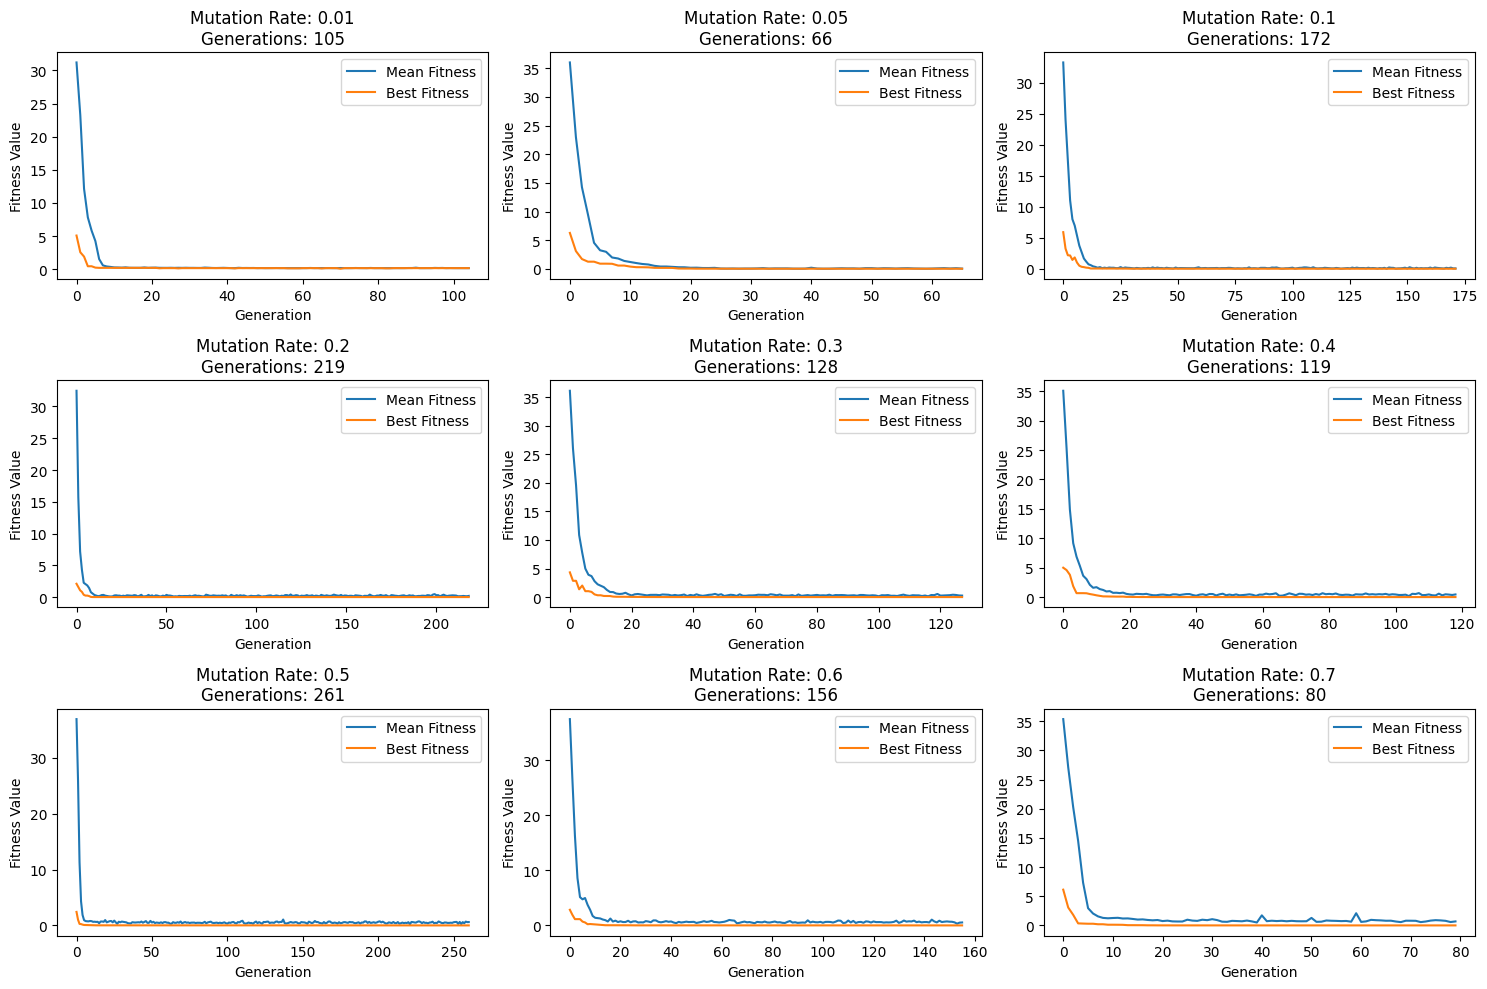

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 110

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")

    return best_fit, mean_fit, count, k + 1

def plot_experiments():
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    max_generations = 1000
    patience = 20
    cross_rate = 0.85

    for ax, mut_rate in zip(axes.flatten(), mutation_rates):
        best_fit, mean_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience)
        x_range = range(len(best_fit))
        ax.plot(x_range, mean_fit, label="Mean Fitness")
        ax.plot(x_range, best_fit, label="Best Fitness")
        ax.set_title(f"Mutation Rate: {mut_rate}\nGenerations: {generations}")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Fitness Value")
        ax.legend()

    plt.tight_layout()
    plt.show()


plot_experiments()


Mutation Rate: 0.01
Best Fitness: 0.09305627362736221
Mean Fitness: 0.11065967861509879
Total Mutation Count: 42
Number of Generations: 35

Mutation Rate: 0.05
Best Fitness: 0.006976143587187012
Mean Fitness: 0.01927257627377631
Total Mutation Count: 489
Number of Generations: 93

Mutation Rate: 0.1
Best Fitness: 0.0007302683229300034
Mean Fitness: 0.07992913398621602
Total Mutation Count: 2411
Number of Generations: 217

Mutation Rate: 0.2
Best Fitness: 0.00041298382538098444
Mean Fitness: 0.2832000555007249
Total Mutation Count: 1397
Number of Generations: 63

Mutation Rate: 0.3
Best Fitness: 5.6304110166114886e-05
Mean Fitness: 0.28843223185794487
Total Mutation Count: 5254
Number of Generations: 158

Mutation Rate: 0.4
Best Fitness: 1.6463276495879684e-05
Mean Fitness: 0.3494784917303453
Total Mutation Count: 8571
Number of Generations: 199

Mutation Rate: 0.5
Best Fitness: 5.350170404450068e-05
Mean Fitness: 0.5254586919106687
Total Mutation Count: 15501
Number of Generations: 280

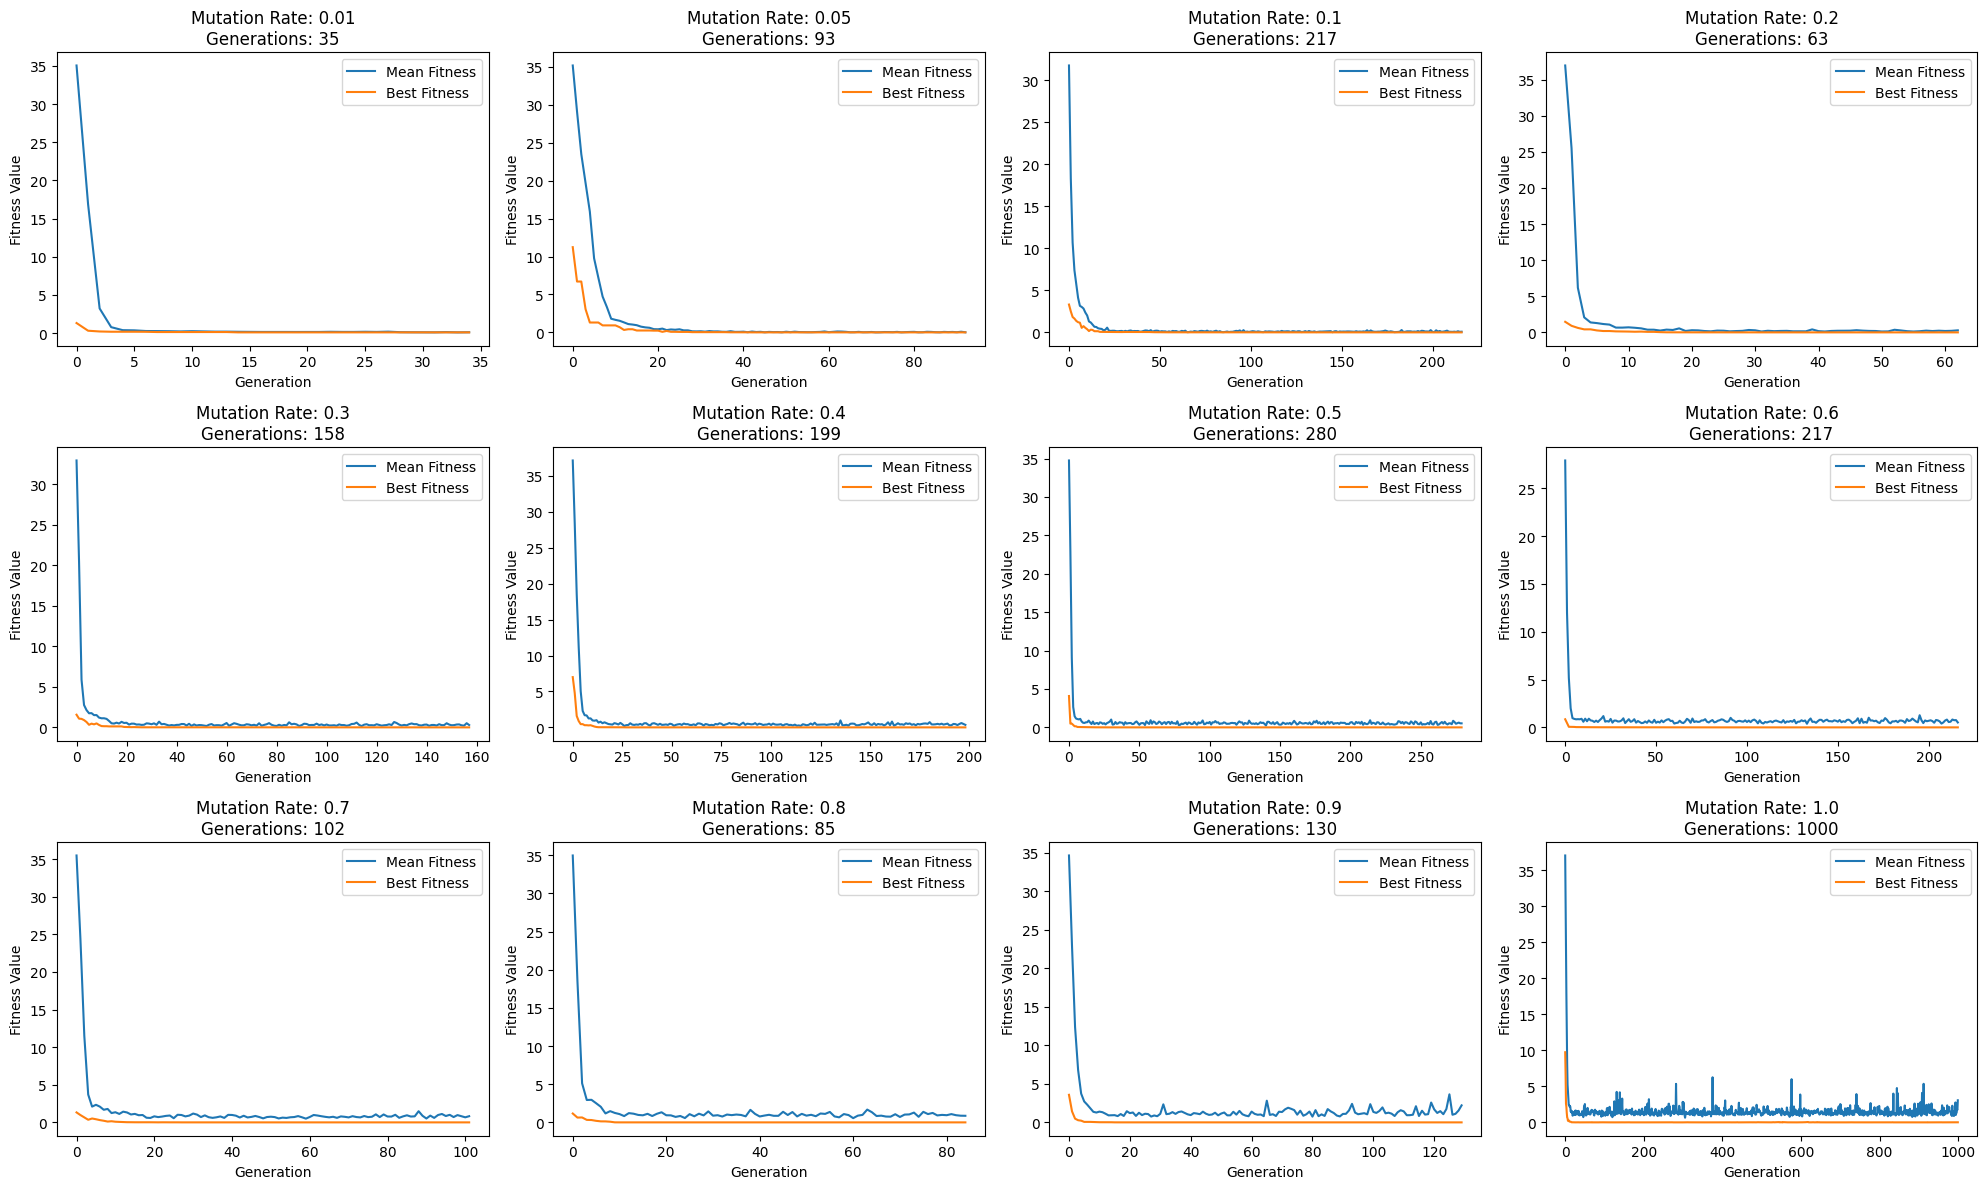

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 110

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")

    return best_fit, mean_fit, count, k + 1

def plot_experiments():
    fig, axes = plt.subplots(3, 4, figsize=(20, 12))
    mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    max_generations = 1000
    patience = 20
    cross_rate = 0.85

    for ax, mut_rate in zip(axes.flatten(), mutation_rates):
        best_fit, mean_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience)
        x_range = range(len(best_fit))
        ax.plot(x_range, mean_fit, label="Mean Fitness")
        ax.plot(x_range, best_fit, label="Best Fitness")
        ax.set_title(f"Mutation Rate: {mut_rate}\nGenerations: {generations}")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Fitness Value")
        ax.legend()

    plt.tight_layout()
    plt.show()


plot_experiments()


Mutation Rate: 0.01
Best Fitness: 0.0029851898585208396
Total Mutation Count: 203
Number of Generations: 165

Mutation Rate: 0.05
Best Fitness: 0.0018000845697864983
Total Mutation Count: 1071
Number of Generations: 198

Mutation Rate: 0.1
Best Fitness: 0.0003289496817904451
Total Mutation Count: 2097
Number of Generations: 196

Mutation Rate: 0.2
Best Fitness: 0.0008468770310116631
Total Mutation Count: 1723
Number of Generations: 79

Mutation Rate: 0.3
Best Fitness: 0.0002238347496162635
Total Mutation Count: 2727
Number of Generations: 81

Mutation Rate: 0.4
Best Fitness: 7.625779558967846e-05
Total Mutation Count: 7612
Number of Generations: 173

Mutation Rate: 0.5
Best Fitness: 9.494025940227294e-06
Total Mutation Count: 8219
Number of Generations: 151

Mutation Rate: 0.6
Best Fitness: 1.3255214330337963e-05
Total Mutation Count: 9353
Number of Generations: 143

Mutation Rate: 0.7
Best Fitness: 1.554033738913567e-05
Total Mutation Count: 12183
Number of Generations: 159

Mutation 

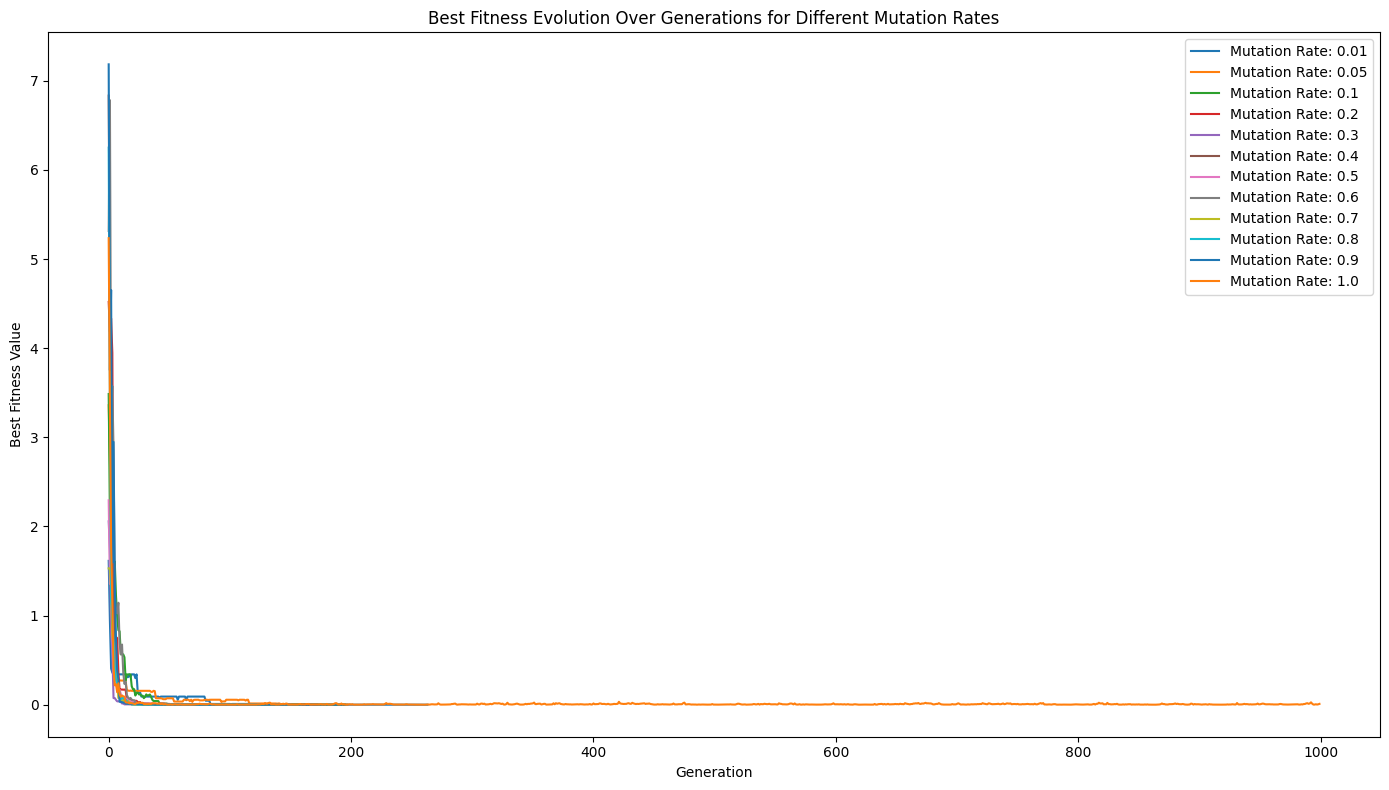

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1  # Increment mutation count each time a mutation occurs
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 110

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")

    return best_fit, count, k + 1

def plot_experiments():
    plt.figure(figsize=(14, 8))
    mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    max_generations = 1000
    patience = 20
    cross_rate = 0.85

    for mut_rate in mutation_rates:
        best_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience)
        x_range = range(len(best_fit))
        plt.plot(x_range, best_fit, label=f"Mutation Rate: {mut_rate}")

    plt.title("Best Fitness Evolution Over Generations for Different Mutation Rates")
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Value")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the plotting function
plot_experiments()


In [ ]:
# Genetic Algorithm for tournament Selection

Mutation Rate: 0.01
Best Fitness: 0.01457787884425521
Mean Fitness: 0.01457787884425521
Total Mutation Count: 99
Number of Generations: 109

Mutation Rate: 0.05
Best Fitness: 0.0025615347284788353
Mean Fitness: 0.07754532220360642
Total Mutation Count: 704
Number of Generations: 127

Mutation Rate: 0.1
Best Fitness: 0.000634327612247339
Mean Fitness: 0.07131152596618603
Total Mutation Count: 1116
Number of Generations: 102

Mutation Rate: 0.2
Best Fitness: 0.00026848508065253495
Mean Fitness: 0.18313101130669152
Total Mutation Count: 2923
Number of Generations: 129

Mutation Rate: 0.3
Best Fitness: 8.734046800947249e-05
Mean Fitness: 0.3029305223128799
Total Mutation Count: 2938
Number of Generations: 89

Mutation Rate: 0.4
Best Fitness: 2.5290196202909724e-05
Mean Fitness: 0.44030601540747416
Total Mutation Count: 5319
Number of Generations: 121

Mutation Rate: 0.5
Best Fitness: 6.347865390168997e-05
Mean Fitness: 0.2990551389522646
Total Mutation Count: 7826
Number of Generations: 14

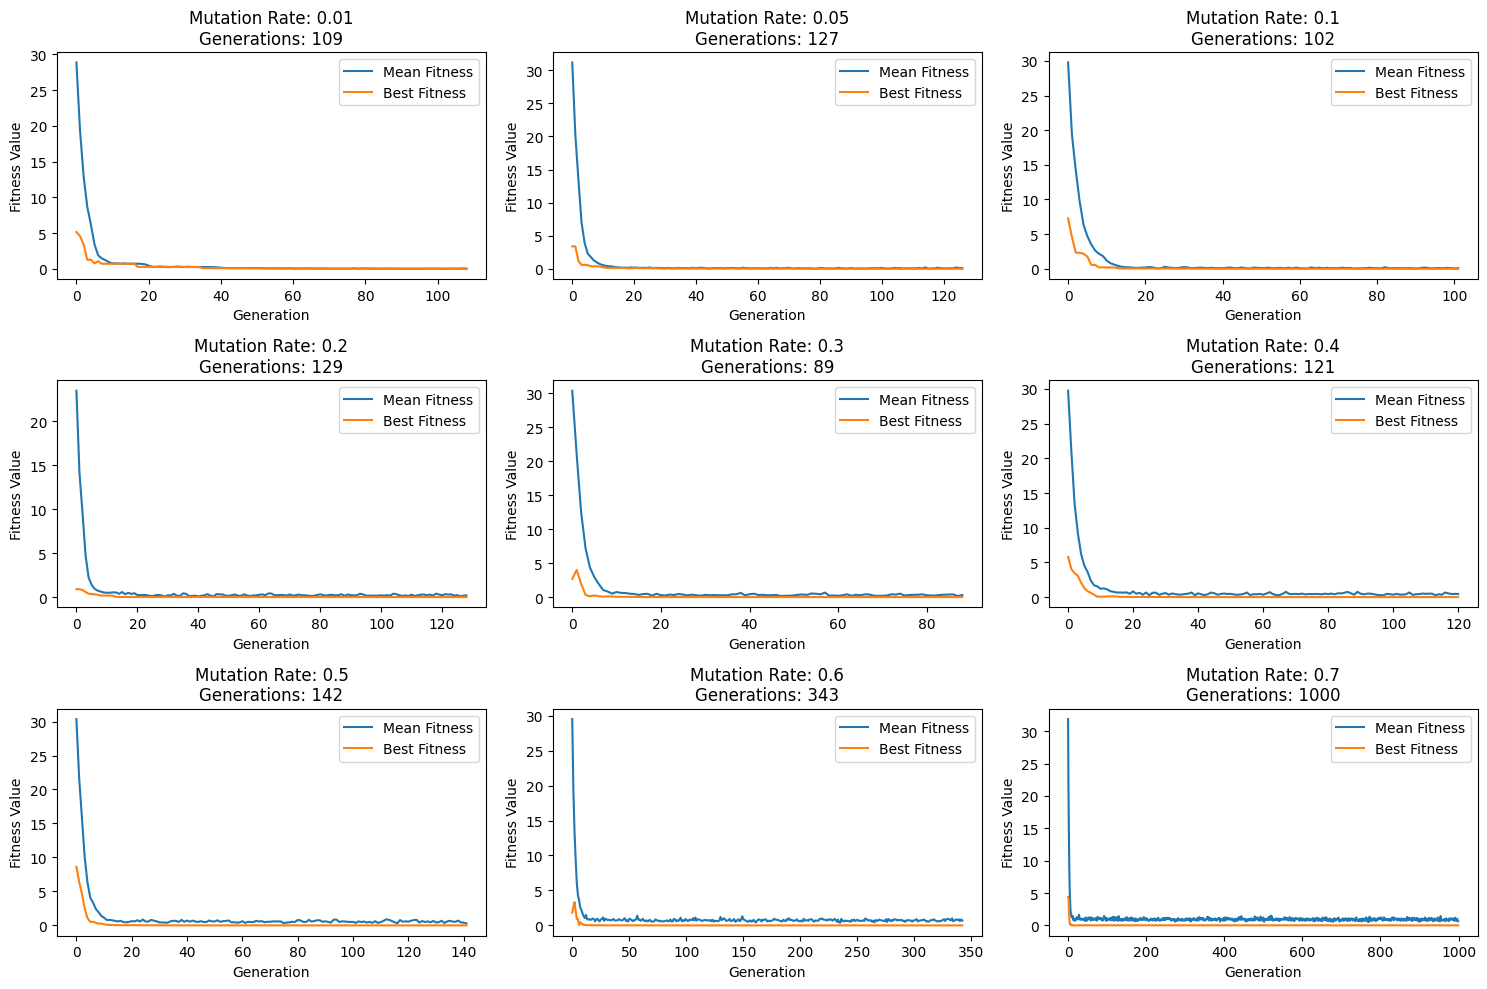

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def tournament_selection(population, fitness, n, tournament_size=3):
    selected = []
    for _ in range(n):
        tournament = random.sample(list(zip(population, fitness)), tournament_size)
        winner = min(tournament, key=lambda x: x[1])  # Select individual with best (lowest) fitness
        selected.append(winner[0])
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1  # Increment mutation count each time a mutation occurs
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 110

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = tournament_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")  # Print the number of generations

    return best_fit, mean_fit, count, k + 1  # Return the number of generations

def plot_experiments():
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    max_generations = 1000
    patience = 20
    cross_rate = 0.85

    for ax, mut_rate in zip(axes.flatten(), mutation_rates):
        best_fit, mean_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience)
        x_range = range(len(best_fit))
        ax.plot(x_range, mean_fit, label="Mean Fitness")
        ax.plot(x_range, best_fit, label="Best Fitness")
        ax.set_title(f"Mutation Rate: {mut_rate}\nGenerations: {generations}")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Fitness Value")
        ax.legend()

    plt.tight_layout()
    plt.show()

# Run the plotting function
plot_experiments()


Mutation Rate: 0.01
Best Fitness: 0.29041396880868475
Mean Fitness: 0.3192004994477667
Total Mutation Count: 50
Number of Generations: 57

Mutation Rate: 0.05
Best Fitness: 0.001521535935639709
Mean Fitness: 0.014855041495985374
Total Mutation Count: 414
Number of Generations: 75

Mutation Rate: 0.1
Best Fitness: 0.00021727428608258324
Mean Fitness: 0.07942836858063773
Total Mutation Count: 1171
Number of Generations: 105

Mutation Rate: 0.2
Best Fitness: 0.00010131545025072906
Mean Fitness: 0.2507115940981663
Total Mutation Count: 2806
Number of Generations: 127

Mutation Rate: 0.3
Best Fitness: 6.801809811657788e-05
Mean Fitness: 0.12783091586683965
Total Mutation Count: 4890
Number of Generations: 148

Mutation Rate: 0.4
Best Fitness: 7.211976787405325e-05
Mean Fitness: 0.6299479810325579
Total Mutation Count: 5977
Number of Generations: 136

Mutation Rate: 0.5
Best Fitness: 8.36822587768808e-05
Mean Fitness: 0.5986094851708258
Total Mutation Count: 4728
Number of Generations: 87

M

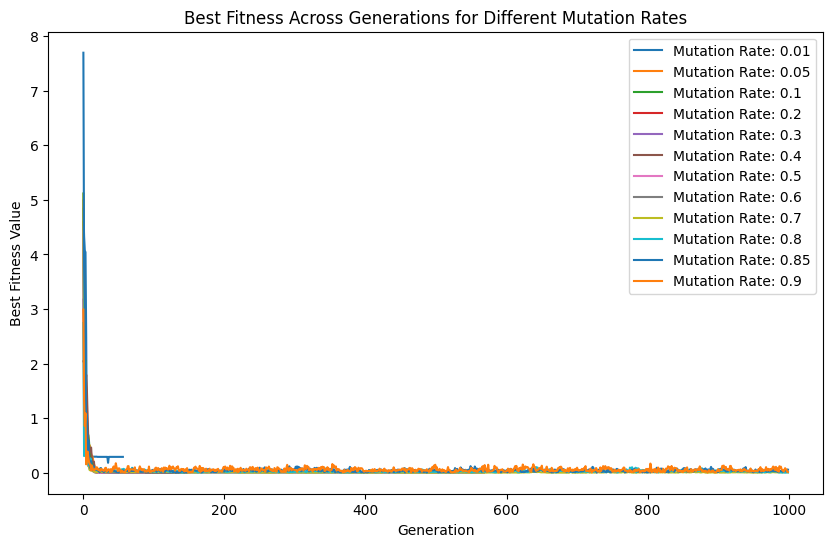

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def tournament_selection(population, fitness, n, tournament_size=3):
    selected = []
    for _ in range(n):
        tournament = random.sample(list(zip(population, fitness)), tournament_size)
        winner = min(tournament, key=lambda x: x[1])  # Select individual with best (lowest) fitness
        selected.append(winner[0])
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1  # Increment mutation count each time a mutation occurs
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 110

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = tournament_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")  # Print the number of generations

    return best_fit, mean_fit, count, k + 1  # Return the number of generations

def plot_experiments():
    mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9]
    max_generations = 1000
    patience = 20
    cross_rate = 0.85

    plt.figure(figsize=(10, 6))
    for mut_rate in mutation_rates:
        best_fit, _, _, _ = run_experiment(cross_rate, mut_rate, max_generations, patience)
        plt.plot(best_fit, label=f"Mutation Rate: {mut_rate}")

    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Value")
    plt.title("Best Fitness Across Generations for Different Mutation Rates")
    plt.legend()
    plt.show()

# Run the plotting function
plot_experiments()


Crossover Rate: 0.1
Best Fitness: 1.172827020317655
Mean Fitness: 10.94380878934937
Total Mutation Count: 69895
Number of Generations: 1000

Crossover Rate: 0.3
Best Fitness: 0.00011472565953254542
Mean Fitness: 5.005742353457802
Total Mutation Count: 11828
Number of Generations: 170

Crossover Rate: 0.5
Best Fitness: 1.6588167407345908e-05
Mean Fitness: 2.0607209285798387
Total Mutation Count: 12490
Number of Generations: 177

Crossover Rate: 0.7
Best Fitness: 1.064045671401305e-05
Mean Fitness: 1.1773910715655327
Total Mutation Count: 5412
Number of Generations: 78

Crossover Rate: 0.8
Best Fitness: 1.1229587379102133e-05
Mean Fitness: 0.9655514536948686
Total Mutation Count: 12176
Number of Generations: 174

Crossover Rate: 0.85
Best Fitness: 1.9856299310189177e-05
Mean Fitness: 1.2472277657449498
Total Mutation Count: 8420
Number of Generations: 120

Crossover Rate: 0.9
Best Fitness: 7.920365534268536e-05
Mean Fitness: 0.6792881122247123
Total Mutation Count: 7937
Number of Generat

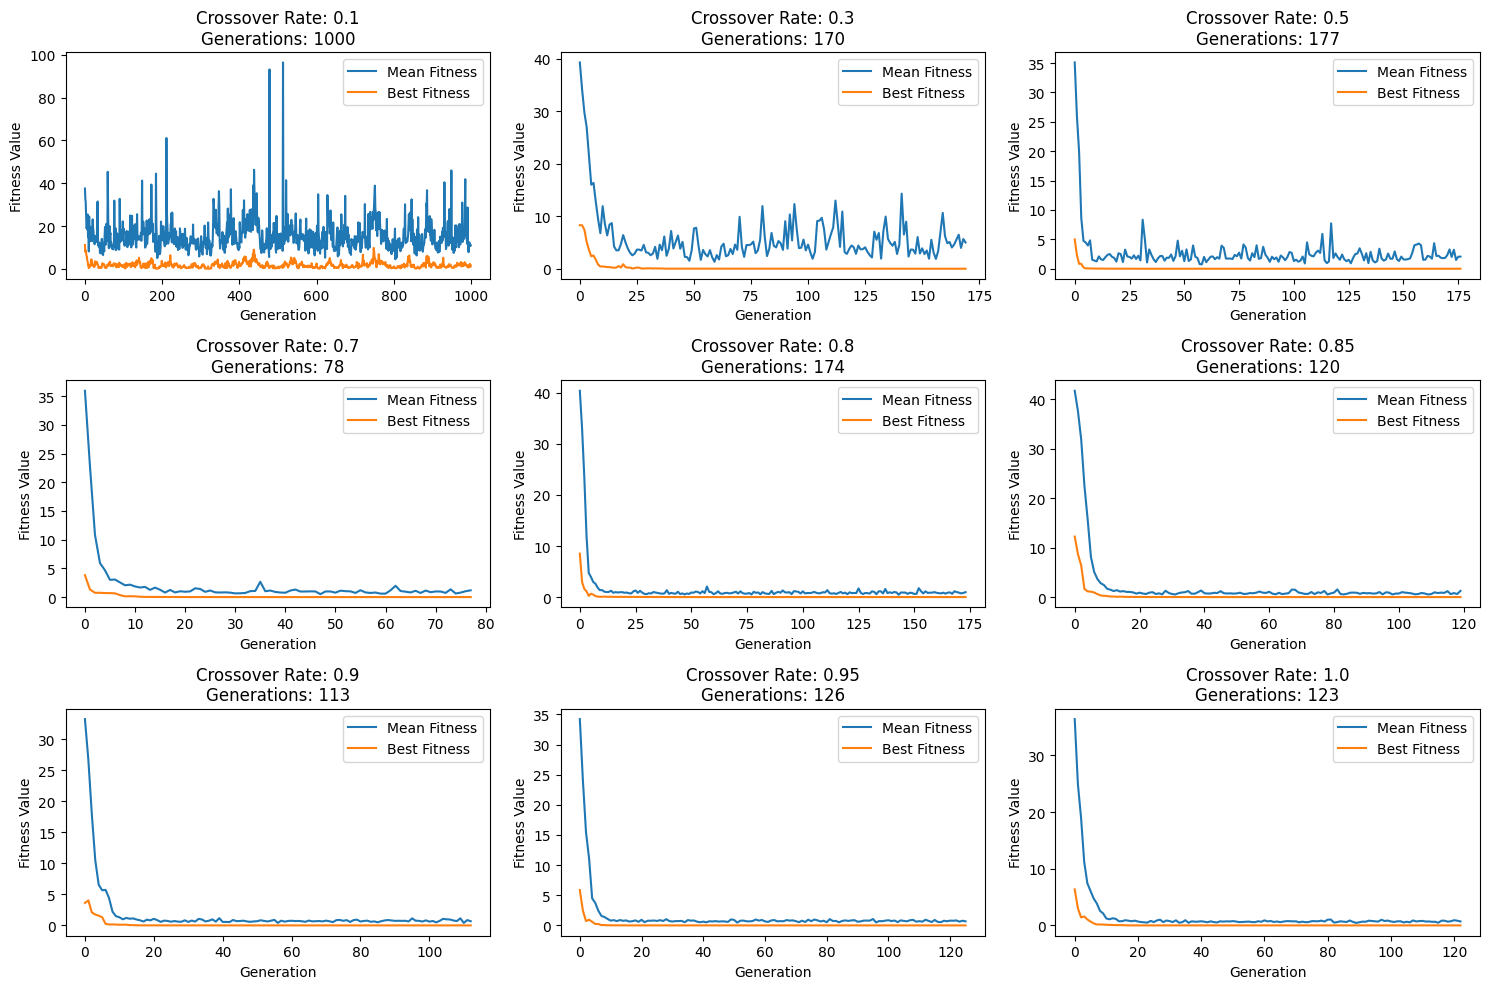

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1  # Increment mutation count each time a mutation occurs
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 100

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Crossover Rate: {cross_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")  # Print the number of generations

    return best_fit, mean_fit, count, k + 1  # Return the number of generations

def plot_experiments():
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    crossover_rates = [0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0]
    max_generations = 1000
    patience = 20
    mutation_rate = 0.7  # Keeping the mutation rate constant

    for ax, cross_rate in zip(axes.flatten(), crossover_rates):
        best_fit, mean_fit, count, generations = run_experiment(cross_rate, mutation_rate, max_generations, patience)
        x_range = range(len(best_fit))
        ax.plot(x_range, mean_fit, label="Mean Fitness")
        ax.plot(x_range, best_fit, label="Best Fitness")
        ax.set_title(f"Crossover Rate: {cross_rate}\nGenerations: {generations}")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Fitness Value")
        ax.legend()

    plt.tight_layout()
    plt.show()

# Run the plotting function
plot_experiments()


Crossover Rate: 0.1
Best Fitness: 0.0009168237018836446
Mean Fitness: 1.7929899846587771
Total Mutation Count: 4956
Number of Generations: 252

Crossover Rate: 0.3
Best Fitness: 0.0007389158081819145
Mean Fitness: 0.6682647744503053
Total Mutation Count: 2348
Number of Generations: 118

Crossover Rate: 0.5
Best Fitness: 0.0004778103956033543
Mean Fitness: 0.39120640599873463
Total Mutation Count: 2648
Number of Generations: 129

Crossover Rate: 0.7
Best Fitness: 0.00020023220789694443
Mean Fitness: 0.32842386941988194
Total Mutation Count: 3015
Number of Generations: 150

Crossover Rate: 0.8
Best Fitness: 0.00012240520662503419
Mean Fitness: 0.32356501694052725
Total Mutation Count: 4843
Number of Generations: 236

Crossover Rate: 0.85
Best Fitness: 0.0002508572279419422
Mean Fitness: 0.14487870574585976
Total Mutation Count: 1901
Number of Generations: 99

Crossover Rate: 0.9
Best Fitness: 0.00034121338101716735
Mean Fitness: 0.20409456519057678
Total Mutation Count: 4072
Number of Ge

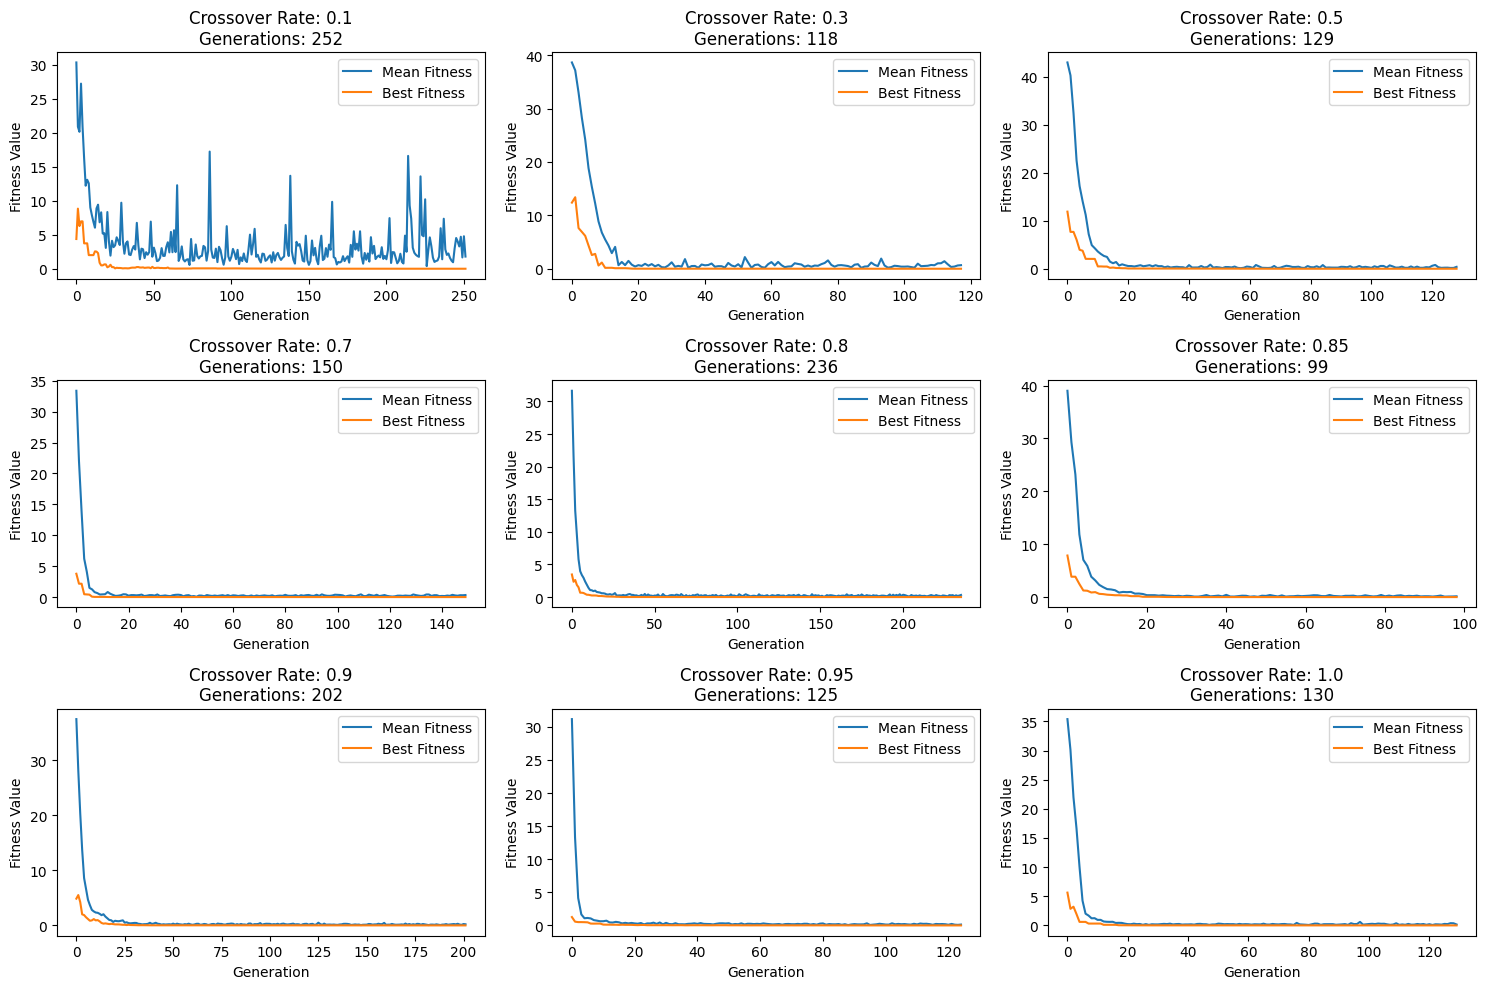

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1  # Increment mutation count each time a mutation occurs
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 100

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Crossover Rate: {cross_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")  # Print the number of generations

    return best_fit, mean_fit, count, k + 1  # Return the number of generations

def plot_experiments():
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    crossover_rates = [0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0]
    max_generations = 1000
    patience = 20
    mutation_rate = 0.2  # Keeping the mutation rate constant

    for ax, cross_rate in zip(axes.flatten(), crossover_rates):
        best_fit, mean_fit, count, generations = run_experiment(cross_rate, mutation_rate, max_generations, patience)
        x_range = range(len(best_fit))
        ax.plot(x_range, mean_fit, label="Mean Fitness")
        ax.plot(x_range, best_fit, label="Best Fitness")
        ax.set_title(f"Crossover Rate: {cross_rate}\nGenerations: {generations}")
        ax.set_xlabel("Generation")
        ax.set_ylabel("Fitness Value")
        ax.legend()

    plt.tight_layout()
    plt.show()

# Run the plotting function
plot_experiments()


Crossover Rate: 0.1
Best Fitness: 1.471137734821256
Mean Fitness: 10.429725889252806
Total Mutation Count: 50243
Number of Generations: 1000

Crossover Rate: 0.3
Best Fitness: 4.27361520887478e-05
Mean Fitness: 2.8131263101435353
Total Mutation Count: 10750
Number of Generations: 214

Crossover Rate: 0.5
Best Fitness: 1.8284524641000182e-05
Mean Fitness: 2.0921611871092023
Total Mutation Count: 11373
Number of Generations: 227

Crossover Rate: 0.7
Best Fitness: 4.9540690066901905e-05
Mean Fitness: 0.5850280126081541
Total Mutation Count: 10104
Number of Generations: 204

Crossover Rate: 0.8
Best Fitness: 5.6272171005837555e-05
Mean Fitness: 0.7216775258543344
Total Mutation Count: 6153
Number of Generations: 124

Crossover Rate: 0.85
Best Fitness: 9.382158878806142e-05
Mean Fitness: 0.5016722093381443
Total Mutation Count: 5244
Number of Generations: 103

Crossover Rate: 0.9
Best Fitness: 8.909330885059557e-05
Mean Fitness: 0.4977528902607288
Total Mutation Count: 11201
Number of Gener

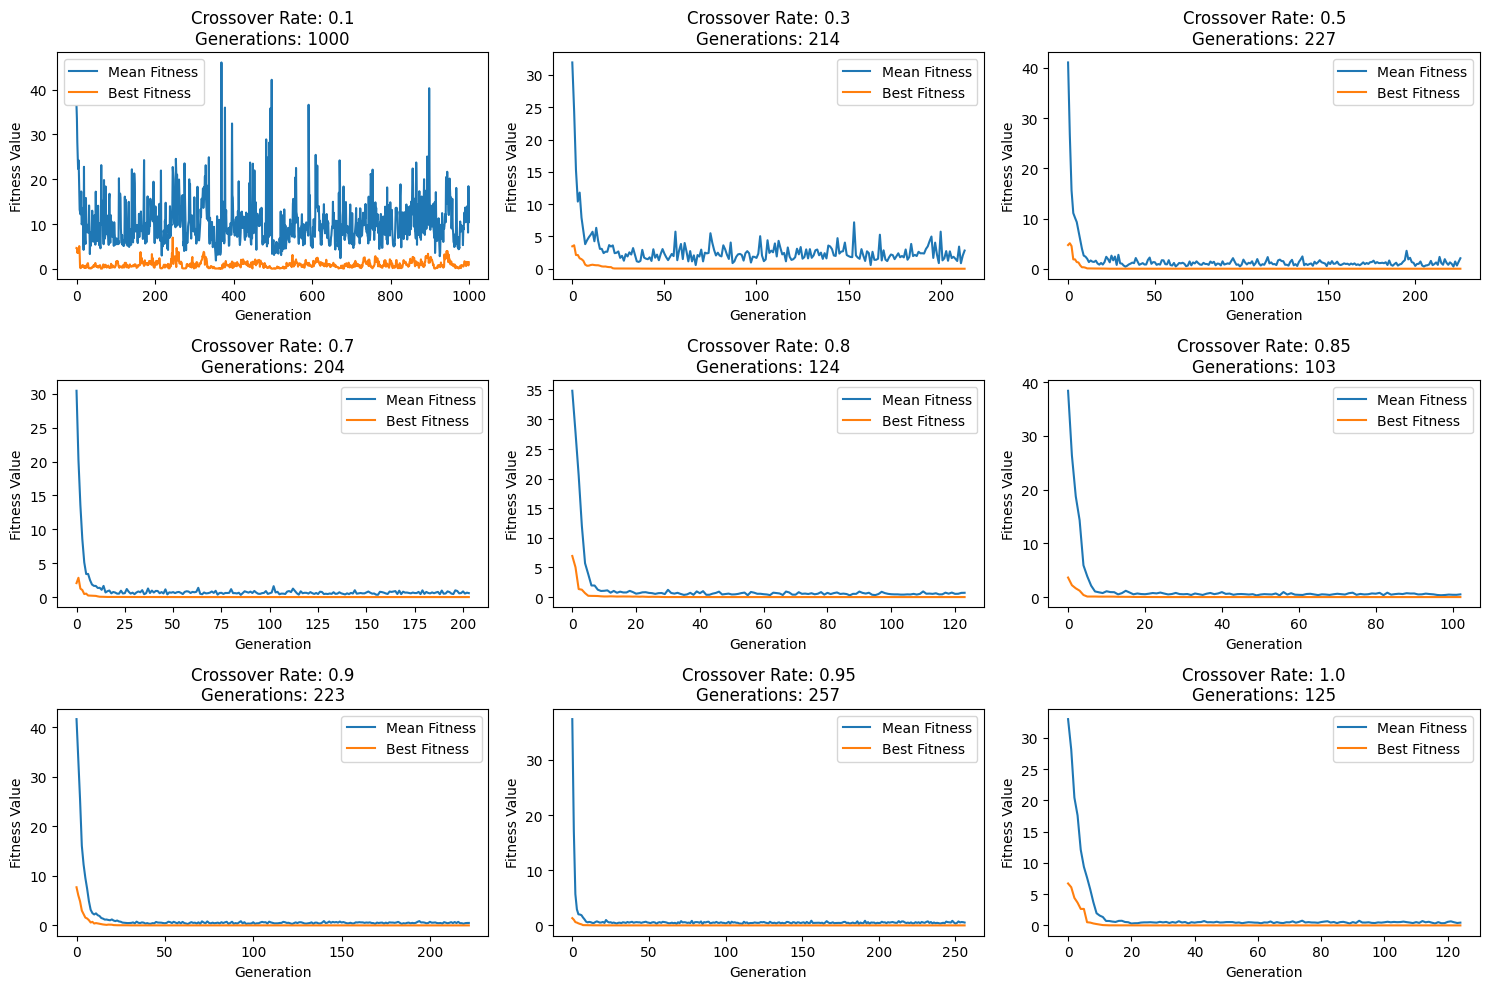

In [ ]:
# fitness function bent cigar function using rouletter_wheel_selection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_bent_cigar(population):
    fitness_values = []
    for individual in population:
        x1 = individual[0]
        sum_xi_squared = np.sum(np.square(individual[1:]))
        fitness = x1**2 + 1e6 * sum_xi_squared
        fitness_values.append(fitness)
    return np.array(fitness_values)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -100
    upper_bound = 100
    population_size = 20000

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0

    for k in range(max_generations):
        fitness = fitness_cal_bent_cigar(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_bent_cigar(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}\n")

    return best_fit, mean_fit, count

def plot_experiment():
    mut_rate = 0.7
    max_generations = 10000
    patience = 20
    cross_rate = 0.85

    best_fit, mean_fit, count = run_experiment(cross_rate, mut_rate, max_generations, patience)
    x_range = range(len(best_fit))
    plt.figure(figsize=(10, 5))
    plt.plot(x_range, mean_fit, label="Mean Fitness")
    plt.plot(x_range, best_fit, label="Best Fitness")
    plt.title(f"Bent Cigar Function - Mutation Rate: {mut_rate}")
    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.legend()
    plt.show()


plot_experiment()


Mutation Rate: 0.7
Best Fitness: 0.32455844608435613
Mean Fitness: 697267.338360533
Total Mutation Count: 827140



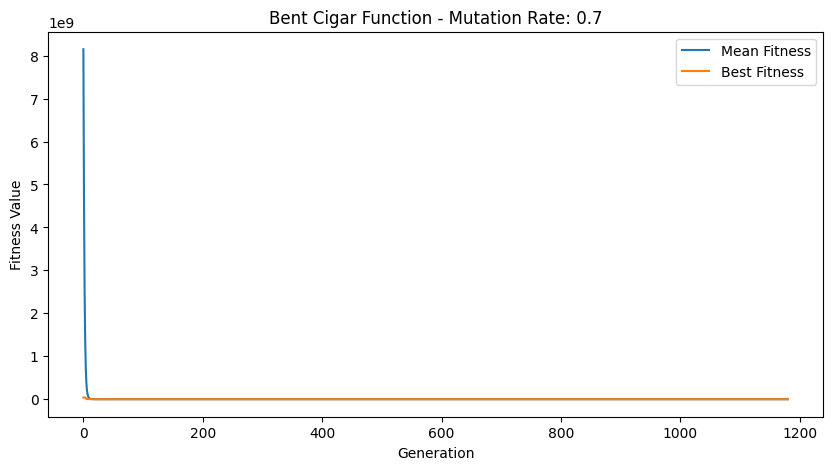

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def fitness_cal_bent_cigar(population):
    fitness_values = []
    for individual in population:
        x1 = individual[0]
        sum_xi_squared = np.sum(np.square(individual[1:]))
        fitness = x1**2 + 1e6 * sum_xi_squared
        fitness_values.append(fitness)
    return np.array(fitness_values)

def tournament_selection(population, fitness, n, tournament_size=3):
    selected = []
    for _ in range(n):
        tournament = random.sample(list(zip(population, fitness)), tournament_size)
        winner = min(tournament, key=lambda x: x[1])
        selected.append(winner[0])
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -100
    upper_bound = 100
    population_size = 1000

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []
    mean_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0

    for k in range(max_generations):
        fitness = fitness_cal_bent_cigar(init_pop)
        selected = tournament_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_bent_cigar(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        fit_mean = np.mean(fitness)
        mean_fit.append(fit_mean)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Mean Fitness: {fit_mean}")
    print(f"Total Mutation Count: {count}\n")

    return best_fit, mean_fit, count

def plot_experiment():
    mut_rate = 0.7
    max_generations = 10000
    patience = 10
    cross_rate = 0.85

    best_fit, mean_fit, count = run_experiment(cross_rate, mut_rate, max_generations, patience)
    x_range = range(len(best_fit))
    plt.figure(figsize=(10, 5))
    plt.plot(x_range, mean_fit, label="Mean Fitness")
    plt.plot(x_range, best_fit, label="Best Fitness")
    plt.title(f"Bent Cigar Function - Mutation Rate: {mut_rate}")
    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.legend()
    plt.show()

plot_experiment()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

"""def fitness_cal_sphere(population):
    return np.sum(np.square(population), axis=1)"""




def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience):
    size = 5
    lower_bound = -5.12
    upper_bound = 5.12
    population_size = 110

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_cal_sphere(init_pop)
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_cal_sphere(mutation_value)
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")

    return best_fit, count, k + 1

In [ ]:
def run_multiple_experiments(cross_rate, mut_rate, max_generations, patience, num_runs):
    best_fitness_values = []
    total_mutation_count = 0
    total_generations = 0

    for _ in range(num_runs):
        best_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience)
        best_fitness_values.append(best_fit[-1])
        total_mutation_count += count
        total_generations += generations

    best_fitness_values = np.array(best_fitness_values)
    mean_fit = np.mean(best_fitness_values)
    median_fit = np.median(best_fitness_values)
    max_fit = np.max(best_fitness_values)
    min_fit = np.min(best_fitness_values)
    std_fit = np.std(best_fitness_values)

    print(f"Results over {num_runs} runs:")
    print(f"Mean Best Fitness: {mean_fit}")
    print(f"Median Best Fitness: {median_fit}")
    print(f"Max Best Fitness: {max_fit}")
    print(f"Min Best Fitness: {min_fit}")
    print(f"Std Dev of Best Fitness: {std_fit}")
    print(f"Total Mutation Count: {total_mutation_count}")
    print(f"Average Generations: {total_generations / num_runs}")

    return best_fitness_values

# Parameters for the experiment
mutation_rate = 0.8
crossover_rate = 0.85
max_generations = 1000
patience = 20
num_runs = 50

# Run the experiment 50 times and gather statistics
best_fitness_values = run_multiple_experiments(crossover_rate, mutation_rate, max_generations, patience, num_runs)


Mutation Rate: 0.8
Best Fitness: 1.0080480897260845e-05
Total Mutation Count: 12117
Number of Generations: 138

Mutation Rate: 0.8
Best Fitness: 4.447497868104839e-05
Total Mutation Count: 14662
Number of Generations: 167

Mutation Rate: 0.8
Best Fitness: 0.00010090147455950781
Total Mutation Count: 6089
Number of Generations: 69

Mutation Rate: 0.8
Best Fitness: 1.734712327396336e-05
Total Mutation Count: 14283
Number of Generations: 163

Mutation Rate: 0.8
Best Fitness: 1.568016802586292e-05
Total Mutation Count: 9599
Number of Generations: 109

Mutation Rate: 0.8
Best Fitness: 3.6439432820726445e-05
Total Mutation Count: 13942
Number of Generations: 158

Mutation Rate: 0.8
Best Fitness: 1.8950296837734927e-05
Total Mutation Count: 11445
Number of Generations: 129

Mutation Rate: 0.8
Best Fitness: 1.3097715434398432e-05
Total Mutation Count: 16510
Number of Generations: 188

Mutation Rate: 0.8
Best Fitness: 6.592482895147852e-06
Total Mutation Count: 20679
Number of Generations: 235


In [ ]:
best_fitness_values = run_multiple_experiments(crossover_rate, mutation_rate, max_generations, patience, 100)

Mutation Rate: 0.8
Best Fitness: 2.3140508505889393e-05
Total Mutation Count: 7202
Number of Generations: 82

Mutation Rate: 0.8
Best Fitness: 1.8648783031597883e-05
Total Mutation Count: 9090
Number of Generations: 103

Mutation Rate: 0.8
Best Fitness: 7.87888436885916e-06
Total Mutation Count: 16027
Number of Generations: 182

Mutation Rate: 0.8
Best Fitness: 8.49758457932619e-06
Total Mutation Count: 21660
Number of Generations: 247

Mutation Rate: 0.8
Best Fitness: 7.330222114117048e-05
Total Mutation Count: 12991
Number of Generations: 148

Mutation Rate: 0.8
Best Fitness: 1.8429326450045987e-05
Total Mutation Count: 12876
Number of Generations: 147

Mutation Rate: 0.8
Best Fitness: 1.4661217445599704e-05
Total Mutation Count: 13932
Number of Generations: 158

Mutation Rate: 0.8
Best Fitness: 7.650971324022822e-06
Total Mutation Count: 21591
Number of Generations: 244

Mutation Rate: 0.8
Best Fitness: 1.929051124606721e-05
Total Mutation Count: 13457
Number of Generations: 153

Mu

In [ ]:
#fitness function Rosenbrock function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Fitness function for Rosenbrock
def fitness_cal_rosenbrock(population):
    return np.sum(100 * (population[:, 1:] - population[:, :-1] ** 2) ** 2 + (1 - population[:, :-1]) ** 2, axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience, fitness_function):
    size = 5  # Size of each individual
    lower_bound = -5
    upper_bound =10
    population_size = 110

    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_function(np.array(init_pop))
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count)
        fitness = fitness_function(np.array(mutation_value))
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")

    return best_fit, count, k + 1

def run_multiple_experiments(cross_rate, mut_rate, max_generations, patience, num_runs, fitness_function):
    best_fitness_values = []
    total_mutation_count = 0
    total_generations = 0

    for _ in range(num_runs):
        best_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience, fitness_function)
        best_fitness_values.append(best_fit[-1])
        total_mutation_count += count
        total_generations += generations

    best_fitness_values = np.array(best_fitness_values)
    mean_fit = np.mean(best_fitness_values)
    median_fit = np.median(best_fitness_values)
    max_fit = np.max(best_fitness_values)
    min_fit = np.min(best_fitness_values)
    std_fit = np.std(best_fitness_values)

    print(f"Results over {num_runs} runs:")
    print(f"Mean Best Fitness: {mean_fit}")
    print(f"Median Best Fitness: {median_fit}")
    print(f"Max Best Fitness: {max_fit}")
    print(f"Min Best Fitness: {min_fit}")
    print(f"Std Dev of Best Fitness: {std_fit}")
    print(f"Total Mutation Count: {total_mutation_count}")
    print(f"Average Generations: {total_generations / num_runs}")

    return best_fitness_values

# Parameters for the experiment
mutation_rate = 0.8
crossover_rate = 0.85
max_generations = 1000
patience = 20
num_runs = 70

# Run the experiment 50 times and gather statistics using Rosenbrock function
best_fitness_values = run_multiple_experiments(crossover_rate, mutation_rate, max_generations, patience, num_runs, fitness_cal_rosenbrock)


Mutation Rate: 0.8
Best Fitness: 0.02994888396038002
Total Mutation Count: 8960
Number of Generations: 102

Mutation Rate: 0.8
Best Fitness: 0.0009000095506286281
Total Mutation Count: 16312
Number of Generations: 186

Mutation Rate: 0.8
Best Fitness: 0.026444722278726948
Total Mutation Count: 16697
Number of Generations: 189

Mutation Rate: 0.8
Best Fitness: 0.6444171219499903
Total Mutation Count: 81870
Number of Generations: 930

Mutation Rate: 0.8
Best Fitness: 0.26156745093963973
Total Mutation Count: 37849
Number of Generations: 430

Mutation Rate: 0.8
Best Fitness: 2.2004381197370178
Total Mutation Count: 88136
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 0.7745890722295199
Total Mutation Count: 22332
Number of Generations: 255

Mutation Rate: 0.8
Best Fitness: 0.9459897830626026
Total Mutation Count: 88264
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 0.8663151274091232
Total Mutation Count: 87917
Number of Generations: 1000

Mutation Rate: 0.8


In [ ]:
#fitness function Rastrigin function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Fitness function for Rastrigin
def fitness_cal_rastrigin(population):
    A = 10
    n = population.shape[1]  # Dimension of the problem
    return A * n + np.sum(population**2 - A * np.cos(2 * np.pi * population), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)  # Avoid division by zero
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count, lower_bound, upper_bound):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            # Ensure that mutated values stay within bounds
            population[i] = np.clip(population[i], lower_bound, upper_bound)
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience, fitness_function, lower_bound, upper_bound):
    size = 5  # Number of variables in each individual
    population_size = 110

    # Initialize the population within the search bounds
    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_function(np.array(init_pop))
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count, lower_bound, upper_bound)
        fitness = fitness_function(np.array(mutation_value))
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")

    return best_fit, count, k + 1

def run_multiple_experiments(cross_rate, mut_rate, max_generations, patience, num_runs, fitness_function, lower_bound, upper_bound):
    best_fitness_values = []
    total_mutation_count = 0
    total_generations = 0

    for _ in range(num_runs):
        best_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience, fitness_function, lower_bound, upper_bound)
        best_fitness_values.append(best_fit[-1])
        total_mutation_count += count
        total_generations += generations

    best_fitness_values = np.array(best_fitness_values)
    mean_fit = np.mean(best_fitness_values)
    median_fit = np.median(best_fitness_values)
    max_fit = np.max(best_fitness_values)
    min_fit = np.min(best_fitness_values)
    std_fit = np.std(best_fitness_values)

    print(f"Results over {num_runs} runs:")
    print(f"Mean Best Fitness: {mean_fit}")
    print(f"Median Best Fitness: {median_fit}")
    print(f"Max Best Fitness: {max_fit}")
    print(f"Min Best Fitness: {min_fit}")
    print(f"Std Dev of Best Fitness: {std_fit}")
    print(f"Total Mutation Count: {total_mutation_count}")
    print(f"Average Generations: {total_generations / num_runs}")

    return best_fitness_values

# Parameters for the experiment
mutation_rate = 0.8
crossover_rate = 0.85
max_generations = 1000
patience = 20
num_runs = 70
lower_bound = -5.12
upper_bound = 5.12

# Run the experiment 50 times and gather statistics using Rastrigin function
best_fitness_values = run_multiple_experiments(crossover_rate, mutation_rate, max_generations, patience, num_runs, fitness_cal_rastrigin, lower_bound, upper_bound)


Mutation Rate: 0.8
Best Fitness: 0.0006093896122578712
Total Mutation Count: 25811
Number of Generations: 292

Mutation Rate: 0.8
Best Fitness: 0.006710415873811826
Total Mutation Count: 18431
Number of Generations: 209

Mutation Rate: 0.8
Best Fitness: 9.599874044141643e-05
Total Mutation Count: 18238
Number of Generations: 207

Mutation Rate: 0.8
Best Fitness: 0.0030330536769156424
Total Mutation Count: 16612
Number of Generations: 188

Mutation Rate: 0.8
Best Fitness: 0.006492857706263067
Total Mutation Count: 17758
Number of Generations: 201

Mutation Rate: 0.8
Best Fitness: 0.0018178915517239602
Total Mutation Count: 10517
Number of Generations: 119

Mutation Rate: 0.8
Best Fitness: 0.002151493201651533
Total Mutation Count: 19613
Number of Generations: 225

Mutation Rate: 0.8
Best Fitness: 0.004071099752216867
Total Mutation Count: 12364
Number of Generations: 140

Mutation Rate: 0.8
Best Fitness: 0.002424089144042796
Total Mutation Count: 16348
Number of Generations: 186

Mutati

In [ ]:
#fitness function Ackley function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Fitness function for Ackley
def fitness_cal_ackley(population):
    A = 20
    B = 0.2
    C = 2 * np.pi
    n = population.shape[1]  # Dimension of the problem
    sum_sq_term = np.sum(population**2, axis=1) / n
    cos_term = np.sum(np.cos(C * population), axis=1) / n
    return -A * np.exp(-B * np.sqrt(sum_sq_term)) - np.exp(cos_term) + A + np.e

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)  # Avoid division by zero
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count, lower_bound, upper_bound):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            # Ensure that mutated values stay within bounds
            population[i] = np.clip(population[i], lower_bound, upper_bound)
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience, fitness_function, lower_bound, upper_bound):
    size = 5  # Number of variables in each individual
    population_size = 110

    # Initialize the population within the search bounds
    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_function(np.array(init_pop))
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count, lower_bound, upper_bound)
        fitness = fitness_function(np.array(mutation_value))
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")

    return best_fit, count, k + 1

def run_multiple_experiments(cross_rate, mut_rate, max_generations, patience, num_runs, fitness_function, lower_bound, upper_bound):
    best_fitness_values = []
    total_mutation_count = 0
    total_generations = 0

    for _ in range(num_runs):
        best_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience, fitness_function, lower_bound, upper_bound)
        best_fitness_values.append(best_fit[-1])
        total_mutation_count += count
        total_generations += generations

    best_fitness_values = np.array(best_fitness_values)
    mean_fit = np.mean(best_fitness_values)
    median_fit = np.median(best_fitness_values)
    max_fit = np.max(best_fitness_values)
    min_fit = np.min(best_fitness_values)
    std_fit = np.std(best_fitness_values)

    print(f"Results over {num_runs} runs:")
    print(f"Mean Best Fitness: {mean_fit}")
    print(f"Median Best Fitness: {median_fit}")
    print(f"Max Best Fitness: {max_fit}")
    print(f"Min Best Fitness: {min_fit}")
    print(f"Std Dev of Best Fitness: {std_fit}")
    print(f"Total Mutation Count: {total_mutation_count}")
    print(f"Average Generations: {total_generations / num_runs}")

    return best_fitness_values

# Parameters for the experiment
mutation_rate = 0.8
crossover_rate = 0.85
max_generations = 1000
patience = 20
num_runs = 70
lower_bound = -5  # Ackley function bounds
upper_bound = 5

# Run the experiment 50 times and gather statistics using Ackley function
best_fitness_values = run_multiple_experiments(crossover_rate, mutation_rate, max_generations, patience, num_runs, fitness_cal_ackley, lower_bound, upper_bound)


Mutation Rate: 0.8
Best Fitness: 0.004810624956033127
Total Mutation Count: 38009
Number of Generations: 432

Mutation Rate: 0.8
Best Fitness: 0.007404747352048435
Total Mutation Count: 22670
Number of Generations: 257

Mutation Rate: 0.8
Best Fitness: 0.007452433220081378
Total Mutation Count: 52740
Number of Generations: 599

Mutation Rate: 0.8
Best Fitness: 0.016547280097729544
Total Mutation Count: 10375
Number of Generations: 119

Mutation Rate: 0.8
Best Fitness: 0.01784793592009537
Total Mutation Count: 17907
Number of Generations: 203

Mutation Rate: 0.8
Best Fitness: 0.007636950952836674
Total Mutation Count: 11861
Number of Generations: 135

Mutation Rate: 0.8
Best Fitness: 0.004573557465619604
Total Mutation Count: 45626
Number of Generations: 518

Mutation Rate: 0.8
Best Fitness: 0.008587275580670184
Total Mutation Count: 25908
Number of Generations: 294

Mutation Rate: 0.8
Best Fitness: 0.0058796918193277925
Total Mutation Count: 14075
Number of Generations: 160

Mutation R

In [ ]:
#fitness function Griewank function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Fitness function for Griewank
def fitness_cal_griewank(population):
    n = population.shape[1]
    sum_term = np.sum(population**2, axis=1) / 4000
    prod_term = np.prod(np.cos(population / np.sqrt(np.arange(1, n + 1))), axis=1)
    return 1 + sum_term - prod_term

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)  # Avoid division by zero
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count, lower_bound, upper_bound):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            # Ensure that mutated values stay within bounds
            population[i] = np.clip(population[i], lower_bound, upper_bound)
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience, fitness_function, lower_bound, upper_bound):
    size = 5  # Number of variables in each individual
    population_size = 110

    # Initialize the population within the search bounds
    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_function(np.array(init_pop))
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count, lower_bound, upper_bound)
        fitness = fitness_function(np.array(mutation_value))
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")

    return best_fit, count, k + 1

def run_multiple_experiments(cross_rate, mut_rate, max_generations, patience, num_runs, fitness_function, lower_bound, upper_bound):
    best_fitness_values = []
    total_mutation_count = 0
    total_generations = 0

    for _ in range(num_runs):
        best_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience, fitness_function, lower_bound, upper_bound)
        best_fitness_values.append(best_fit[-1])
        total_mutation_count += count
        total_generations += generations

    best_fitness_values = np.array(best_fitness_values)
    mean_fit = np.mean(best_fitness_values)
    median_fit = np.median(best_fitness_values)
    max_fit = np.max(best_fitness_values)
    min_fit = np.min(best_fitness_values)
    std_fit = np.std(best_fitness_values)

    print(f"Results over {num_runs} runs:")
    print(f"Mean Best Fitness: {mean_fit}")
    print(f"Median Best Fitness: {median_fit}")
    print(f"Max Best Fitness: {max_fit}")
    print(f"Min Best Fitness: {min_fit}")
    print(f"Std Dev of Best Fitness: {std_fit}")
    print(f"Total Mutation Count: {total_mutation_count}")
    print(f"Average Generations: {total_generations / num_runs}")

    return best_fitness_values

# Parameters for the experiment
mutation_rate = 0.8
crossover_rate = 0.85
max_generations = 1000
patience = 20
num_runs = 70
lower_bound = -600
upper_bound = 600

# Run the experiment 50 times and gather statistics using Griewank function
best_fitness_values = run_multiple_experiments(crossover_rate, mutation_rate, max_generations, patience, num_runs, fitness_cal_griewank, lower_bound, upper_bound)


Mutation Rate: 0.8
Best Fitness: 6.5736430806764945
Total Mutation Count: 88060
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 0.6509112717967176
Total Mutation Count: 88075
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 2.1841925672365745
Total Mutation Count: 87987
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 0.7865948698990051
Total Mutation Count: 88086
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 0.6195254874965196
Total Mutation Count: 87995
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 0.67327618814734
Total Mutation Count: 87811
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 0.6036889692536699
Total Mutation Count: 88089
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 1.02437960574415
Total Mutation Count: 87861
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 1.0588323581566557
Total Mutation Count: 88067
Number of Generations: 1000

Mutation Rate: 0.8
Best

In [ ]:
#fitness function schwefel function

In [ ]:
import numpy as np
import random

# Fitness function for Schwefel
def fitness_cal_schwefel(population):
    n = population.shape[1]
    return 418.9829 * n - np.sum(population * np.sin(np.sqrt(np.abs(population))), axis=1)

def cumulative_function(fitness):
    total_fitness = np.sum(fitness)
    relative_fitness = fitness / total_fitness
    cumulative_fitness = np.cumsum(relative_fitness)
    return cumulative_fitness

def roulette_wheel_selection(population, fitness, n):
    inverse_fitness = 1 / (fitness + 1e-6)  # Avoid division by zero
    cumulative_fitness = cumulative_function(inverse_fitness)
    selected = []
    for _ in range(n):
        r = np.random.rand()
        for i, individual in enumerate(population):
            if r <= cumulative_fitness[i]:
                selected.append(individual)
                break
    return selected

def crossover_method(population, cross_rate, n):
    offspring = []
    for _ in range(n):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if np.random.rand() < cross_rate:
            cross_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
            child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring[:n]

def mutation(population, mut_rate, count, lower_bound, upper_bound):
    for i in range(len(population)):
        if np.random.rand() < mut_rate:
            mutate_idx = random.randint(0, len(population[i]) - 1)
            population[i][mutate_idx] += np.random.normal()
            # Ensure that mutated values stay within bounds
            population[i] = np.clip(population[i], lower_bound, upper_bound)
            count += 1
    return population, count

def run_experiment(cross_rate, mut_rate, max_generations, patience, fitness_function, lower_bound, upper_bound):
    size = 5  # Number of variables in each individual
    population_size = 110

    # Initialize the population within the search bounds
    init_pop = [np.random.uniform(lower_bound, upper_bound, size) for _ in range(population_size)]
    best_fit = []

    prev_best_fit = None
    stagnant_generations = 0
    count = 0  # Initialize mutation count

    for k in range(max_generations):
        fitness = fitness_function(np.array(init_pop))
        selected = roulette_wheel_selection(init_pop, fitness, len(init_pop))
        crossover_value = crossover_method(selected, cross_rate, len(init_pop))
        mutation_value, count = mutation(crossover_value, mut_rate, count, lower_bound, upper_bound)
        fitness = fitness_function(np.array(mutation_value))
        fit_best = np.min(fitness)
        best_fit.append(fit_best)
        init_pop = mutation_value

        if prev_best_fit is not None and fit_best == prev_best_fit:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= patience:
            break

        prev_best_fit = fit_best

    print(f"Mutation Rate: {mut_rate}")
    print(f"Best Fitness: {fit_best}")
    print(f"Total Mutation Count: {count}")
    print(f"Number of Generations: {k + 1}\n")

    return best_fit, count, k + 1

def run_multiple_experiments(cross_rate, mut_rate, max_generations, patience, num_runs, fitness_function, lower_bound, upper_bound):
    best_fitness_values = []
    total_mutation_count = 0
    total_generations = 0

    for _ in range(num_runs):
        best_fit, count, generations = run_experiment(cross_rate, mut_rate, max_generations, patience, fitness_function, lower_bound, upper_bound)
        best_fitness_values.append(best_fit[-1])
        total_mutation_count += count
        total_generations += generations

    best_fitness_values = np.array(best_fitness_values)
    mean_fit = np.mean(best_fitness_values)
    median_fit = np.median(best_fitness_values)
    max_fit = np.max(best_fitness_values)
    min_fit = np.min(best_fitness_values)
    std_fit = np.std(best_fitness_values)

    print(f"Results over {num_runs} runs:")
    print(f"Mean Best Fitness: {mean_fit}")
    print(f"Median Best Fitness: {median_fit}")
    print(f"Max Best Fitness: {max_fit}")
    print(f"Min Best Fitness: {min_fit}")
    print(f"Std Dev of Best Fitness: {std_fit}")
    print(f"Total Mutation Count: {total_mutation_count}")
    print(f"Average Generations: {total_generations / num_runs}")

    return best_fitness_values

# Parameters for the experiment
mutation_rate = 0.8
crossover_rate = 0.85
max_generations = 1000
patience = 20
num_runs = 70
lower_bound = -500
upper_bound = 500

# Run the experiment 50 times and gather statistics using Schwefel function
best_fitness_values = run_multiple_experiments(crossover_rate, mutation_rate, max_generations, patience, num_runs, fitness_cal_schwefel, lower_bound, upper_bound)


Mutation Rate: 0.8
Best Fitness: 119.98649907946537
Total Mutation Count: 87851
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 237.65848882882278
Total Mutation Count: 87792
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 6.673405232504592e-05
Total Mutation Count: 33976
Number of Generations: 386

Mutation Rate: 0.8
Best Fitness: 239.40278072568344
Total Mutation Count: 87926
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 237.83766197368686
Total Mutation Count: 87978
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 118.74040326286695
Total Mutation Count: 88057
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 8.099860815491411e-05
Total Mutation Count: 21326
Number of Generations: 242

Mutation Rate: 0.8
Best Fitness: 120.29767774273455
Total Mutation Count: 88072
Number of Generations: 1000

Mutation Rate: 0.8
Best Fitness: 574.0718133930372
Total Mutation Count: 87988
Number of Generations: 1000

Mutation Rate: 0